In [1]:
#import all library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# read csv file
housing = pd.read_csv('../data/cleaned_train_data_wo_lat_long.csv')
housing.head()

,tranc_yearmonth,flat_type,storey_range,flat_model,resale_price,tranc_year,tranc_month,mid_storey,full_flat_type,floor_area_sqft,hdb_age,max_floor_lvl,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,bus_stop_nearest_distance,bus_stop_name,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,region,mature
0,2016-05,4 ROOM,10 TO 12,Model A,680000.0,2016,5,11,4 ROOM Model A,968.760,15,25,1,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,29.427395,Blk 3B,1138.633422,Geylang Methodist School,78,1,1138.633422,Geylang Methodist School,224,0,Central,1
1,2012-07,5 ROOM,07 TO 09,Improved,665000.0,2012,7,8,5 ROOM Improved,1399.320,34,9,1,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,58.207761,BLK 151A MKT,415.607357,Kuo Chuan Presbyterian Primary School,45,1,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,Central,1
2,2013-07,EXECUTIVE,13 TO 15,Apartment,838000.0,2013,7,14,EXECUTIVE Apartment,1550.016,24,16,1,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,214.747860,Blk 289E,498.849039,Keming Primary School,39,0,180.074558,Yusof Ishak Secondary School,188,0,West,0
3,2012-04,4 ROOM,01 TO 05,Model A,550000.0,2012,4,3,4 ROOM Model A,1108.692,29,11,1,1,0,0,0,75,0,0,0,68,7,0,0,0,0,0,0,0,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,43.396521,Opp Bishan Nth Shop Mall,389.515528,Catholic High School,20,1,389.515528,Catholic High School,253,1,Central,1
4,2017-12,4 ROOM,01 TO 03,Simplified,298000.0,2017,12,2,4 ROOM Simplified,893.412,34,4,1,0,0,0,0,48,0,0,0,30,18,0,0,0,0,0,0,0,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,129.422752,Blk 873,401.200584,Naval Base Primary School,74,0,312.025435,Orchid Park Secondary School,208,0,North,0


In [3]:
housing.describe()

,resale_price,tranc_year,tranc_month,mid_storey,floor_area_sqft,hdb_age,max_floor_lvl,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,mature
count,1.498050e+05,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.0,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000,149805.000000
mean,4.486621e+05,2016.466513,6.586756,8.263609,1046.562426,28.683362,15.107914,1.0,0.191930,0.000100,0.000280,0.000754,124.592070,0.139581,1.765615,39.277033,49.927406,26.304082,5.973486,0.024105,0.431054,0.063963,0.625827,0.059577,0.000340,664.239826,0.490097,1.796669,5.197650,1167.736858,0.490357,1.409532,3.801242,48.701746,58.293308,764.021115,0.545095,0.261453,115.194170,394.903494,55.308948,0.113187,507.628791,210.131070,0.031935,0.441941
std,1.432125e+05,2.742246,3.339708,5.482182,263.060119,12.040577,6.194526,0.0,0.393819,0.010006,0.016742,0.027455,58.309788,5.964397,11.685666,68.858414,45.237296,33.489464,19.179633,1.138619,5.211552,2.033778,11.224543,0.669054,0.024372,368.739209,0.729616,1.421038,3.469713,1071.185899,0.767145,1.711411,4.009217,19.150471,55.513732,429.111674,0.497964,0.439428,55.564721,234.186949,17.883460,0.316822,308.752257,20.005265,0.175827,0.496619
min,1.500000e+05,2012.000000,1.000000,2.000000,333.684000,3.000000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.873295,0.000000,0.000000,0.000000,0.000000,0.000000,21.971410,0.000000,0.000000,9.001285,45.668324,20.000000,0.000000,38.913475,188.000000,0.000000,0.000000
25%,3.460000e+05,2014.000000,4.000000,5.000000,807.300000,20.000000,12.000000,1.0,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,391.473823,0.000000,1.000000,3.000000,371.492143,0.000000,0.000000,1.000000,40.000000,0.000000,458.086392,0.000000,0.000000,74.959608,227.083164,44.000000,0.000000,289.176378,188.000000,0.000000,0.000000
50%,4.200000e+05,2017.000000,7.000000,8.000000,1022.580000,31.000000,13.000000,1.0,0.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,0.000000,44.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,602.818388,0.000000,2.000000,5.000000,776.137748,0.000000,1.000000,2.000000,43.000000,52.000000,681.853546,1.000000,0.000000,107.686727,348.724666,54.000000,0.000000,446.671027,208.000000,0.000000,0.000000
75%,5.200000e+05,2019.000000,9.000000,11.000000,1205.568000,37.000000,16.000000,1.0,0.000000,0.000000,0.000000,0.000000,144.000000,0.000000,0.000000,66.000000,73.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,868.818288,1.000000,3.000000,6.000000,1671.774246,1.000000,2.000000,7.000000,60.000000,99.000000,974.299230,1.000000,1.000000,146.624537,502.097957,67.000000,0.000000,642.519665,224.000000,0.00

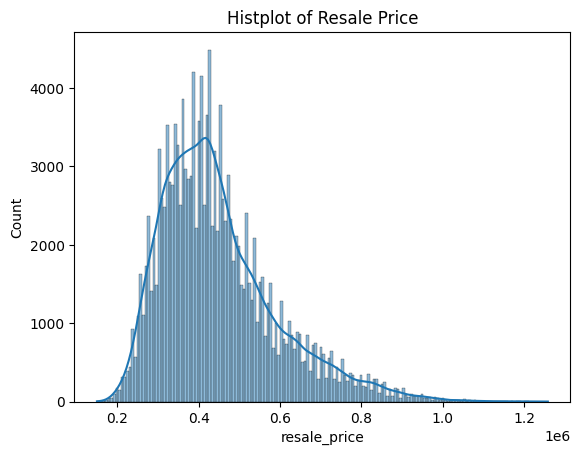

In [4]:
sns.histplot(data=housing, x="resale_price", kde=True)
plt.title('Histplot of Resale Price')
plt.show()

Left Skewed

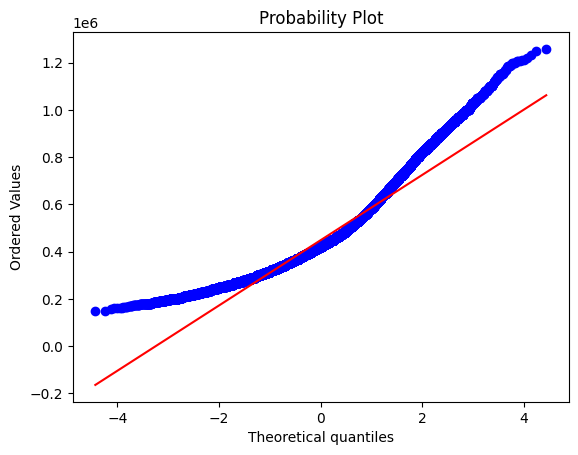

In [5]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(housing['resale_price'], plot=plt)
plt.show()

Deviate from the normal distribution and Left Skewed

As the distribution is skewed we have to transform it such that it follows a normal distribution.

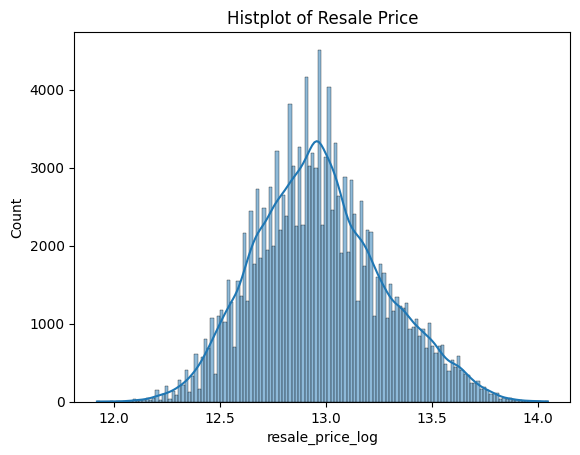

In [6]:
housing['resale_price_log'] = np.log(housing['resale_price'])

sns.histplot(data=housing, x="resale_price_log", kde=True)
plt.title('Histplot of Resale Price')
plt.show()

Look normal distribution

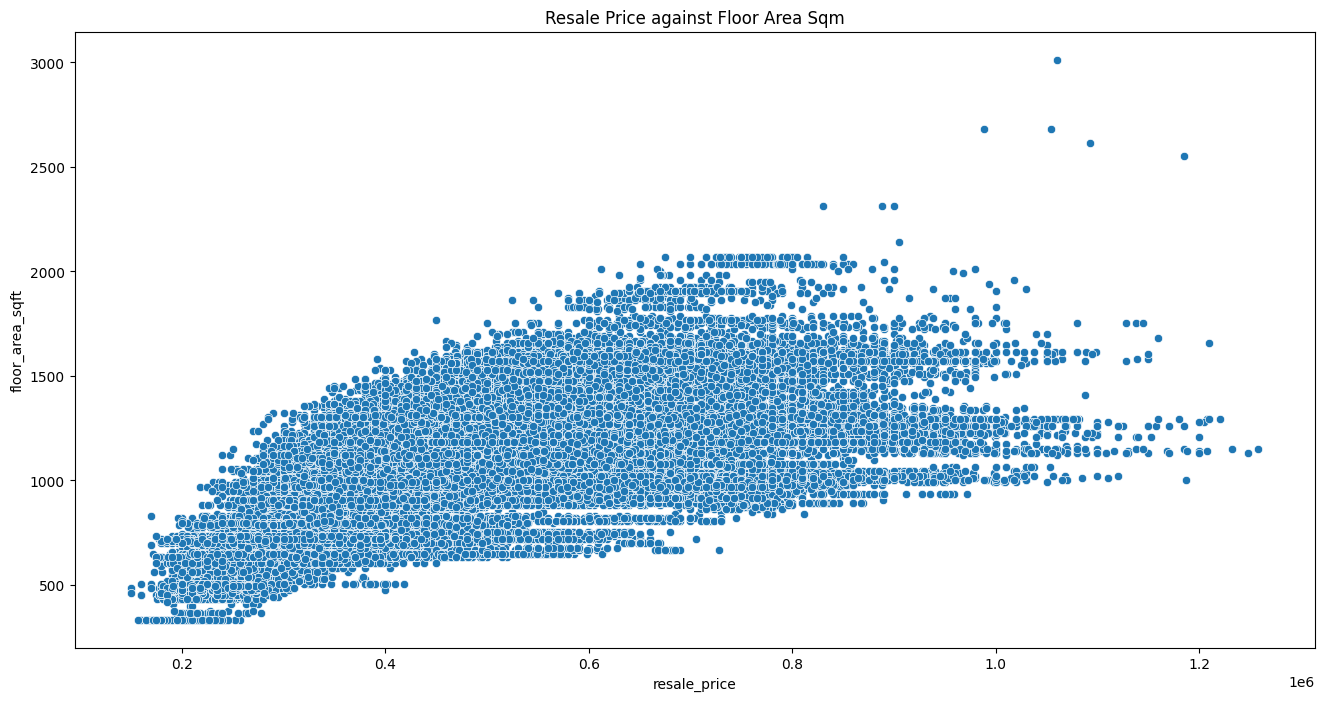

In [7]:
plt.figure(figsize = (16, 8))
sns.scatterplot(data=housing, x="resale_price", y="floor_area_sqft")
plt.title('Resale Price against Floor Area Sqm')
plt.show()

Based on the above scattered plot, we could identify that they are outliners. Also, rather than a liner line, a log line fit plot better as the relationship is not linear. 

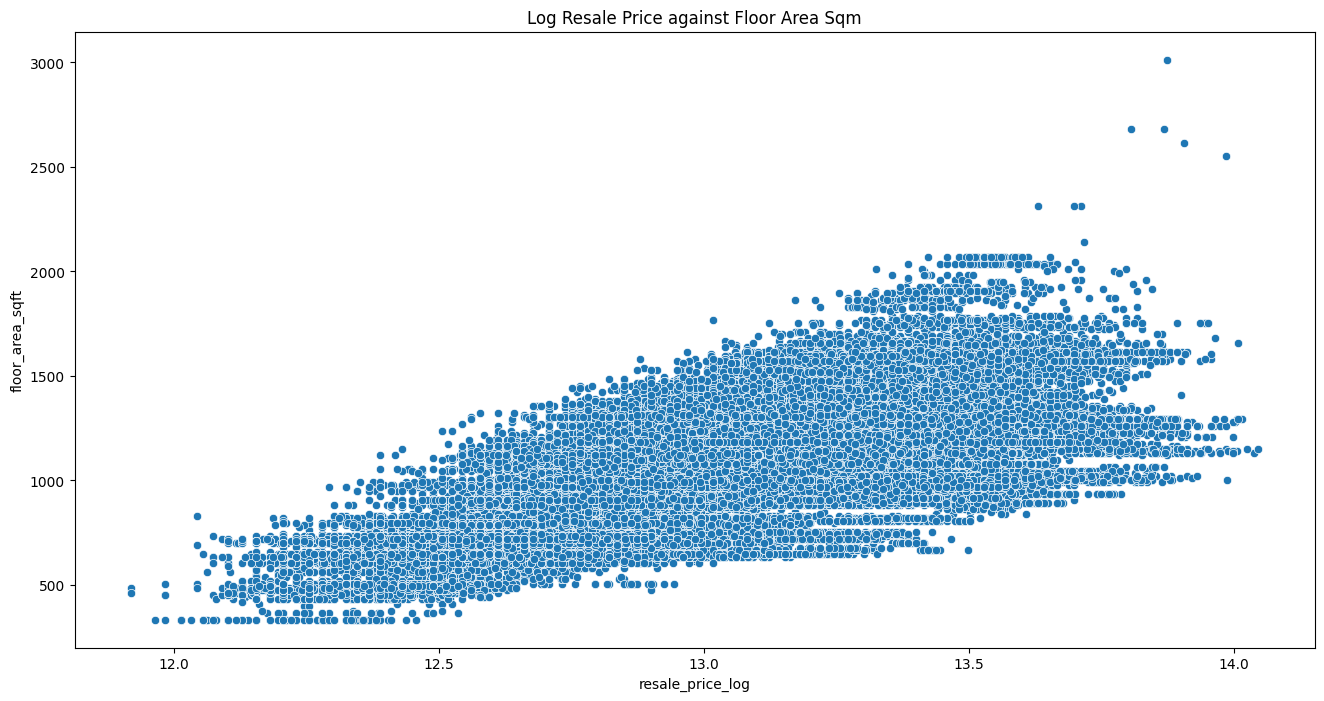

In [8]:
plt.figure(figsize = (16, 8))
sns.scatterplot(data=housing, x="resale_price_log", y="floor_area_sqft")
plt.title('Log Resale Price against Floor Area Sqm')
plt.show()

### Identify Outliners

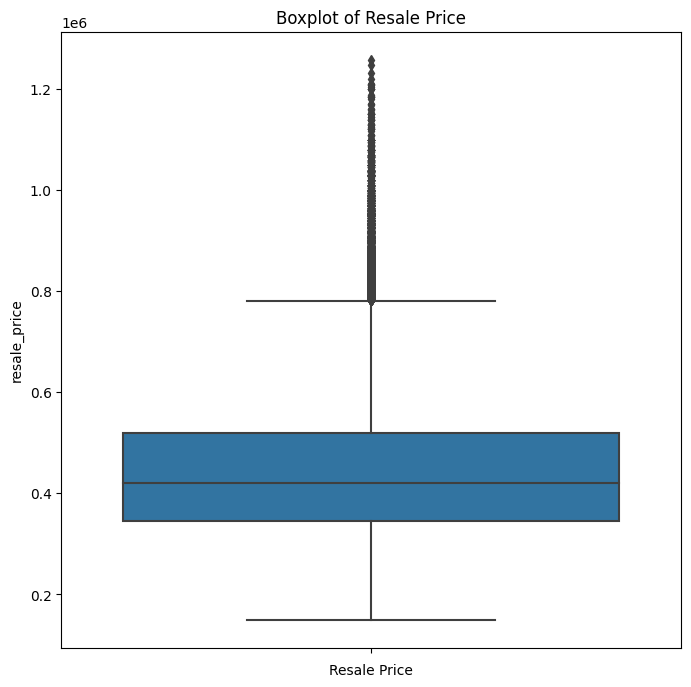

In [9]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=housing, y='resale_price')
plt.title('Boxplot of Resale Price')
plt.xlabel('Resale Price')
plt.show()

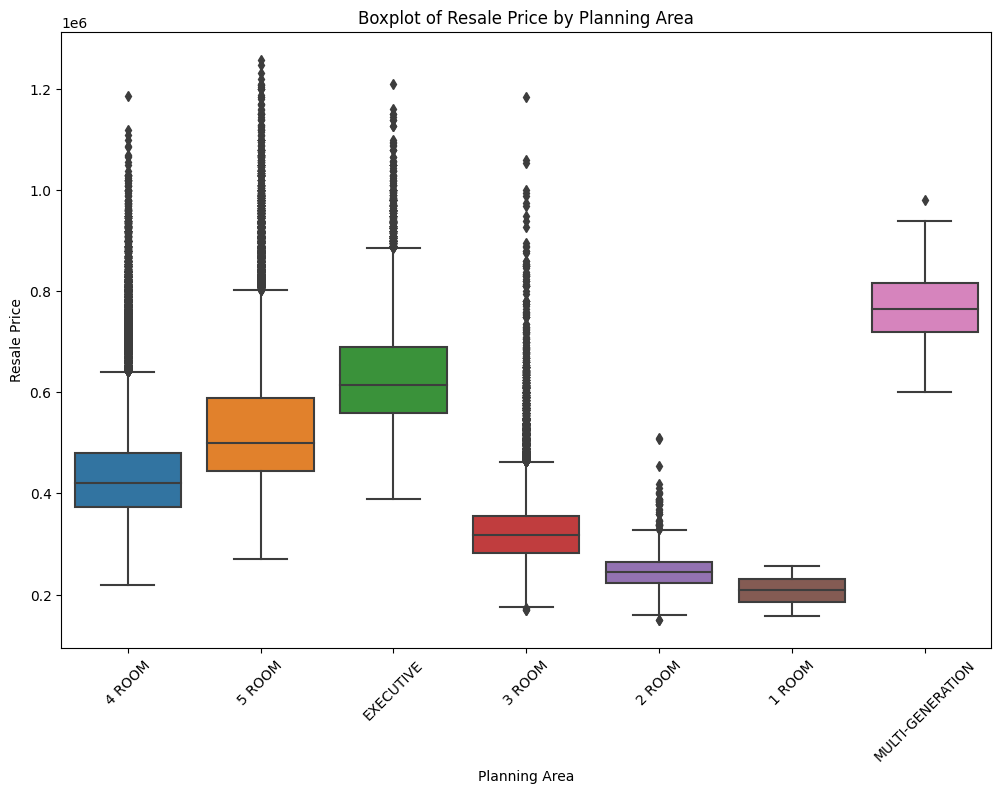

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=housing, x='flat_type', y='resale_price')
plt.title('Boxplot of Resale Price by Planning Area')
plt.xlabel('Planning Area')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [11]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper_bound = q3 + 1.5 * IQR
   bottom_bound = q1 - 1.5 * IQR

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [12]:
outliers = find_outliers_IQR(housing['resale_price'])

print(f"Number of outliers: {len(outliers)}")

print(f"Max outliers: {outliers.max()}")

print(f"Min outliers: {outliers.min()}")

Number of outliers: 4916
Max outliers: 1258000.0
Min outliers: 781888.0


In [13]:
housing.shape

(149805, 58)

In [14]:
outliner_percent = (4916/149805)*100
print(f"Outliner Percent: {outliner_percent}")

Outliner Percent: 3.281599412569674


As regression is very sentitive to outliner, we can either drop it, replace it with median, replace it with a cap value or use treat it as NA and use KNN 

### Overview of the housing resale price in Singapore

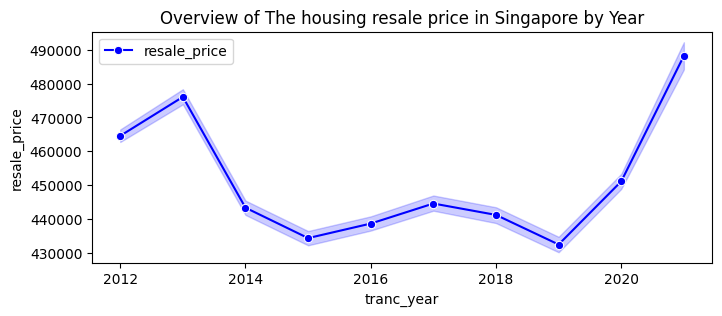

In [15]:
# Overview of the housing resale price in Singapore by year
plt.figure(figsize = (8, 3))
sns.lineplot(x = "tranc_year", y = "resale_price", color='blue', label='resale_price',marker='o', data = housing )
plt.title('Overview of The housing resale price in Singapore by Year')
plt.show()

In [16]:
housing[housing['tranc_year'] == 2021]['tranc_month'].unique()

array([4, 1, 2, 3], dtype=int64)

Starting from 2019,Covid-19 pandemic disrupted BTO construction. Due to the long waiting time, some decided to get a resale flat instead. This in turn  drove the resale demand and price (Michelle,2023). 


### 2013 to 2019

#### Policy affecting HDB prices

As seen from the chart below, average HDB price was trending down from 2013. This might be mainly due to the property cooling measures implemented in July 2013 to make sure the borrowers do not overstretch themselves financially for their property purchases. The intention of the measures is ensure that borrowers have enough income to make property loan repayments before purchasing one.

The government introduced the total debt servicing ratio (TDSR) and mortgage servicing ratio (MSR) policy. 

#### Total Debt Servicing Ratio (TDSR) 

The Total Debt Service Ratio (TDSR) is a calculation used by lenders to evaluate applicants' ability to meet their debt obligations. It measures the percentage of gross monthly income that goes towards servicing all debt, including housing loans, car loans and credit cards (Lendela,2023).

#### Mortgage Servicing Ratio (MSR)

The Mortgage Servicing Ratio (MSR) is a limit on how much you can borrow when taking a home loan based on gross monthly income too. Howvever, this only applies to HDB flats and new executive condominiums (ECs) (DollarBack Mortgage,n.d). 


The implementation of these measures to restrict available loans has led to a decrease in inflation in Singapore.

### Average Resale Price by Demand

In [17]:
housing_till_2021 = list(range(2012,2021,1))
housing_till_2021

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

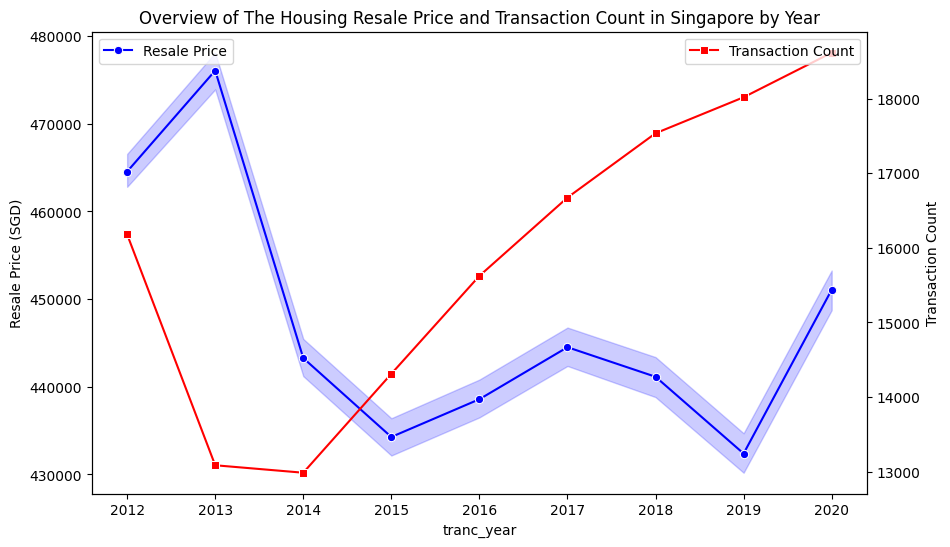

In [18]:
# Create a figure and axis for the plot

housing_till_2020 = list(range(2012,2021,1))
housing_till_2020 = housing[housing['tranc_year'].isin(housing_till_2020)]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot resale price on the first y-axis
sns.lineplot(x="tranc_year", y="resale_price", color='blue', label='Resale Price', marker='o', data=housing_till_2020, ax=ax1)
ax1.set_ylabel('Resale Price (SGD)')

# Create a second y-axis for transaction count
ax2 = ax1.twinx()
df = housing_till_2020.groupby('tranc_year').size().reset_index(name='count')
sns.lineplot(x="tranc_year", y="count", color='red', label='Transaction Count', marker='s', data=df, ax=ax2)
ax2.set_ylabel('Transaction Count')

# Set title and legend
ax1.set_title('Overview of The Housing Resale Price and Transaction Count in Singapore by Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

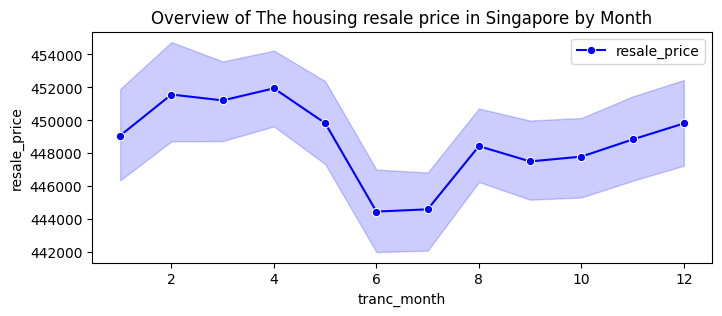

In [19]:
# Overview of the housing resale price in Singapore by month
plt.figure(figsize = (8, 3))
sns.lineplot(x = "tranc_month", y = "resale_price", label='resale_price',marker='o', data = housing , color = 'blue')
plt.title('Overview of The housing resale price in Singapore by Month')
plt.show()

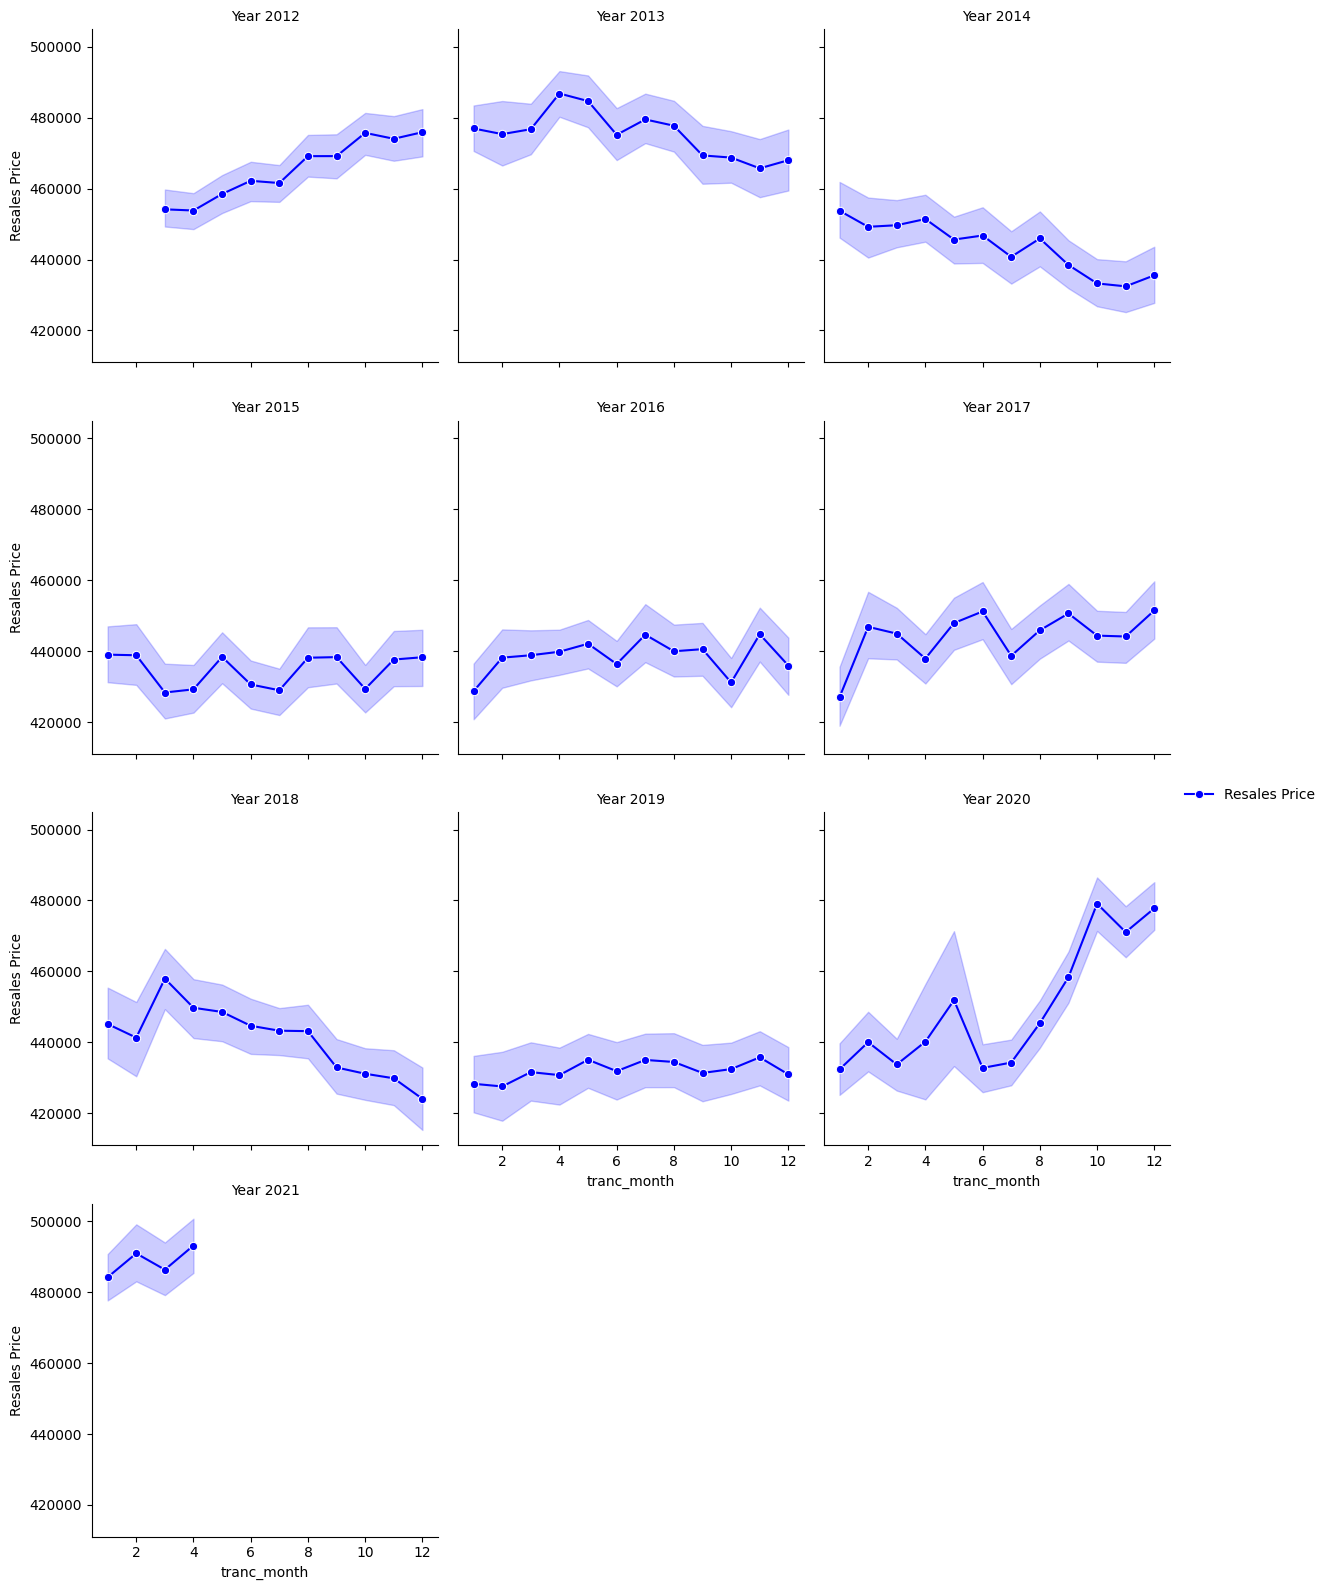

In [20]:
# Create a FacetGrid
g = sns.FacetGrid(housing, col="tranc_year", col_wrap=3, height=4)

# Bar plot for total_rainfall
g.map(sns.lineplot, "tranc_month", "resale_price", color='blue', label='Resales Price',marker='o')


# Adjust layout
g.set_axis_labels("tranc_month", "Resales Price")
g.set_titles("Year {col_name}")
g.add_legend()

plt.show()

The dip in resale prices observed between June and July was likely heavily influenced by the year 2020. Therefore, it's advisable to prioritize "transaction year-month" (tranc_yearmonth) over individual transaction years or months during the feature selection phase.

### Average Resale Price by HDB Age

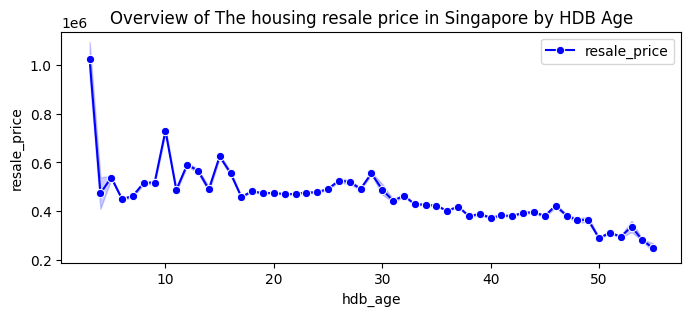

In [21]:
plt.figure(figsize = (8, 3))
sns.lineplot(x = "hdb_age", y = "resale_price", color='blue', label='resale_price',marker='o', data = housing )
plt.title('Overview of The housing resale price in Singapore by HDB Age')
plt.show()

The value of the housing depreciates as the unit ages.

### Total Demand by HDB Age

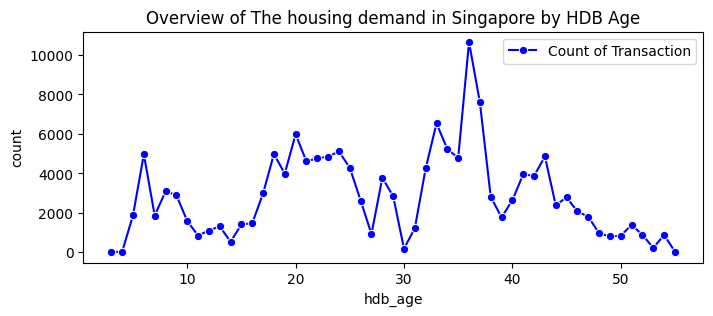

In [22]:
plt.figure(figsize = (8, 3))
df = housing.groupby('hdb_age').size().reset_index(name='count')
sns.lineplot(x = "hdb_age", y = "count", color='blue', label='Count of Transaction',marker='o', data = df)
plt.title('Overview of The housing demand in Singapore by HDB Age')
plt.show()

However, it has been observed that most homeowners sell their houses when the properties are approximately 35 years old. New homeowners should expect most of the resale units in Singapore will be about 35 years old.

### Average Resale Price by Flat Type

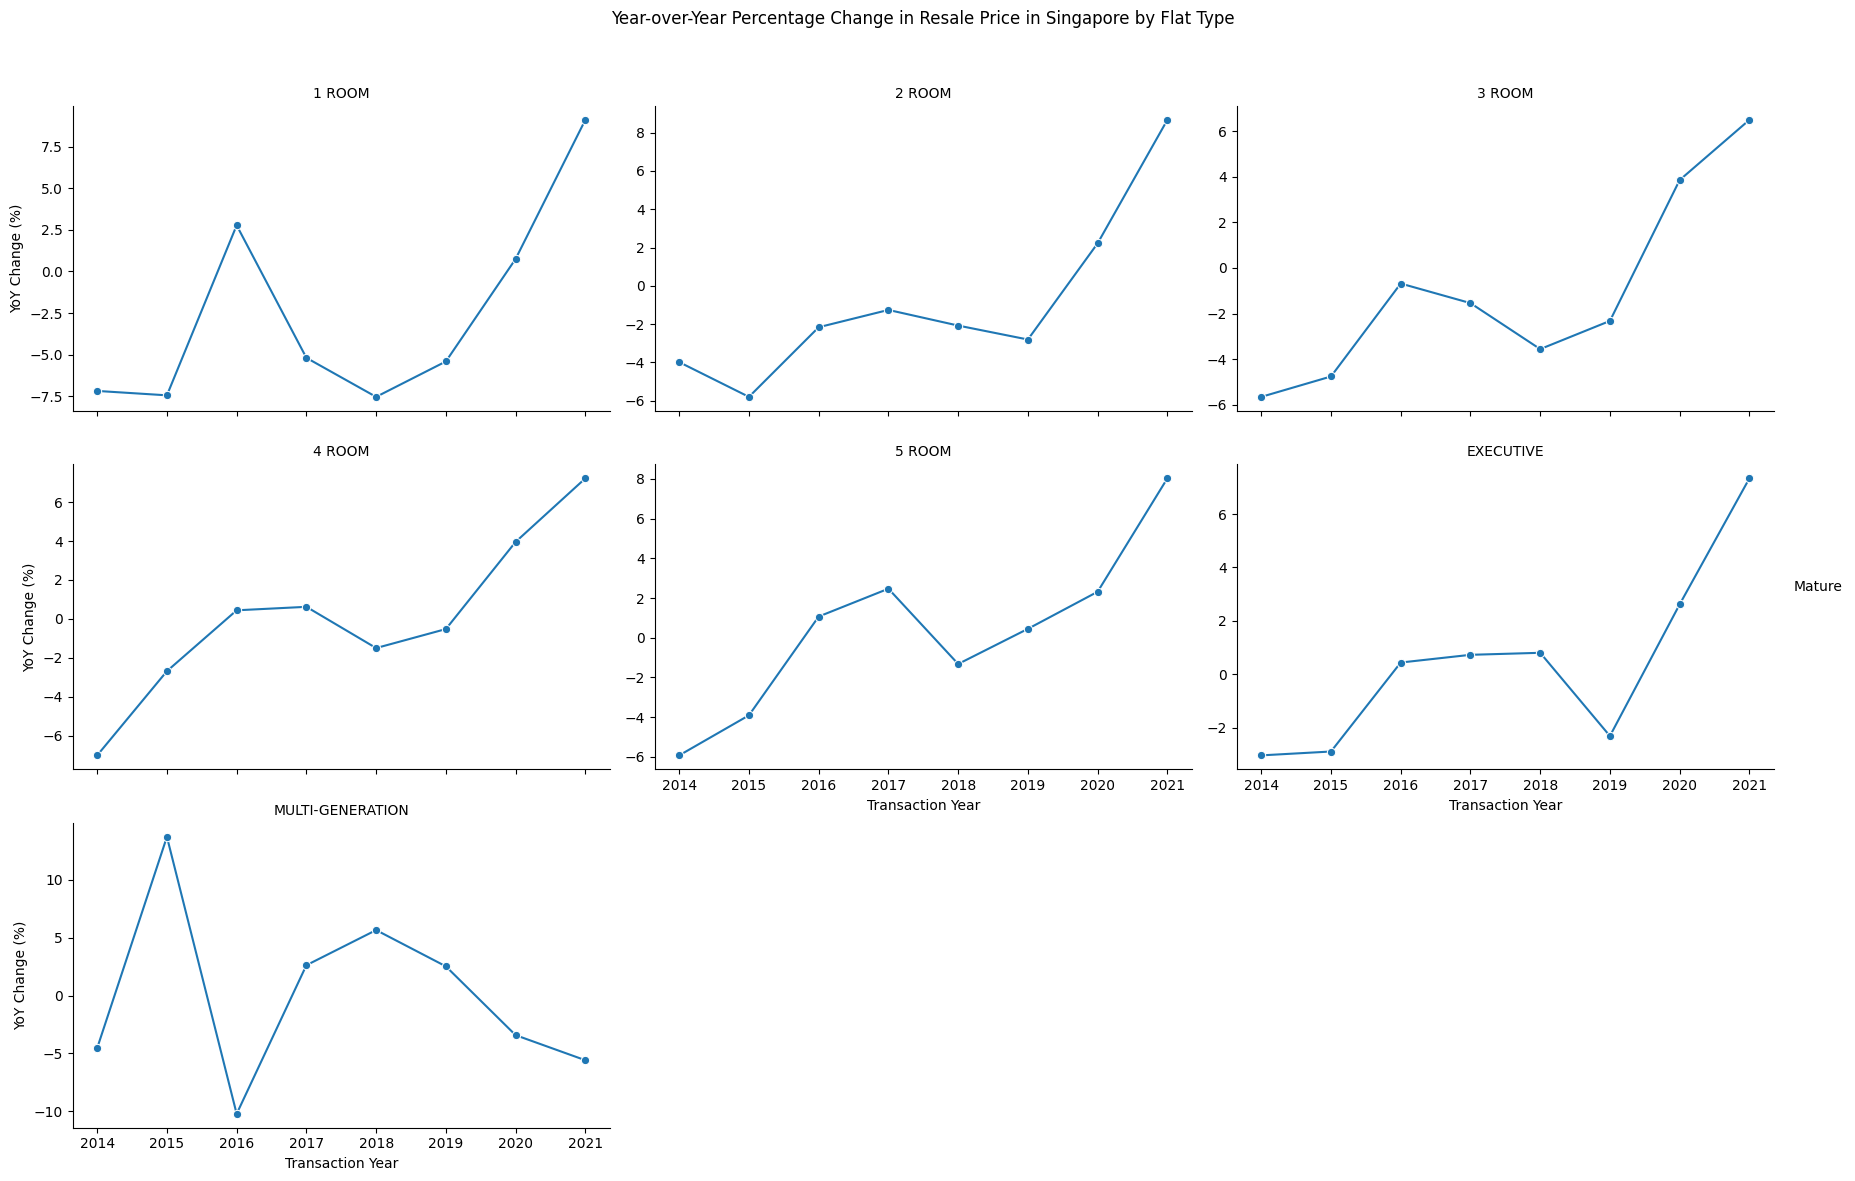

In [23]:
# Calculate the average resale price for each year and region
df = housing.groupby(['tranc_year', 'flat_type']).agg({'resale_price': 'mean'}).reset_index()

# Sort the DataFrame by region and transaction year in ascending order
df = df.sort_values(by=['flat_type', 'tranc_year'], ascending=True)

# Calculate the year-over-year percentage change for each region
df['YOY%'] = df.groupby('flat_type')['resale_price'].pct_change() * 100

# Filter out the year 2013
df = df[df['tranc_year'] != 2013]

# Plotting using FacetGrid
g = sns.FacetGrid(df, col='flat_type', col_wrap=3, height=4, aspect=1.5, sharey=False)
g.map(sns.lineplot, 'tranc_year', 'YOY%', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Transaction Year', 'YoY Change (%)')
g.add_legend(title='Mature')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Year-over-Year Percentage Change in Resale Price in Singapore by Flat Type')
plt.show()

While the majority of flat types exhibit a consistent pattern of year-over-year percentage changes (YOY%) over the observed time frame, the Multi-Generation flat type diverges from this trend. In 2015, it experienced a sharp increase compared to other flat types, followed by a decline starting from 2018 while others were still increasing.

### Total Demand by Flat Type

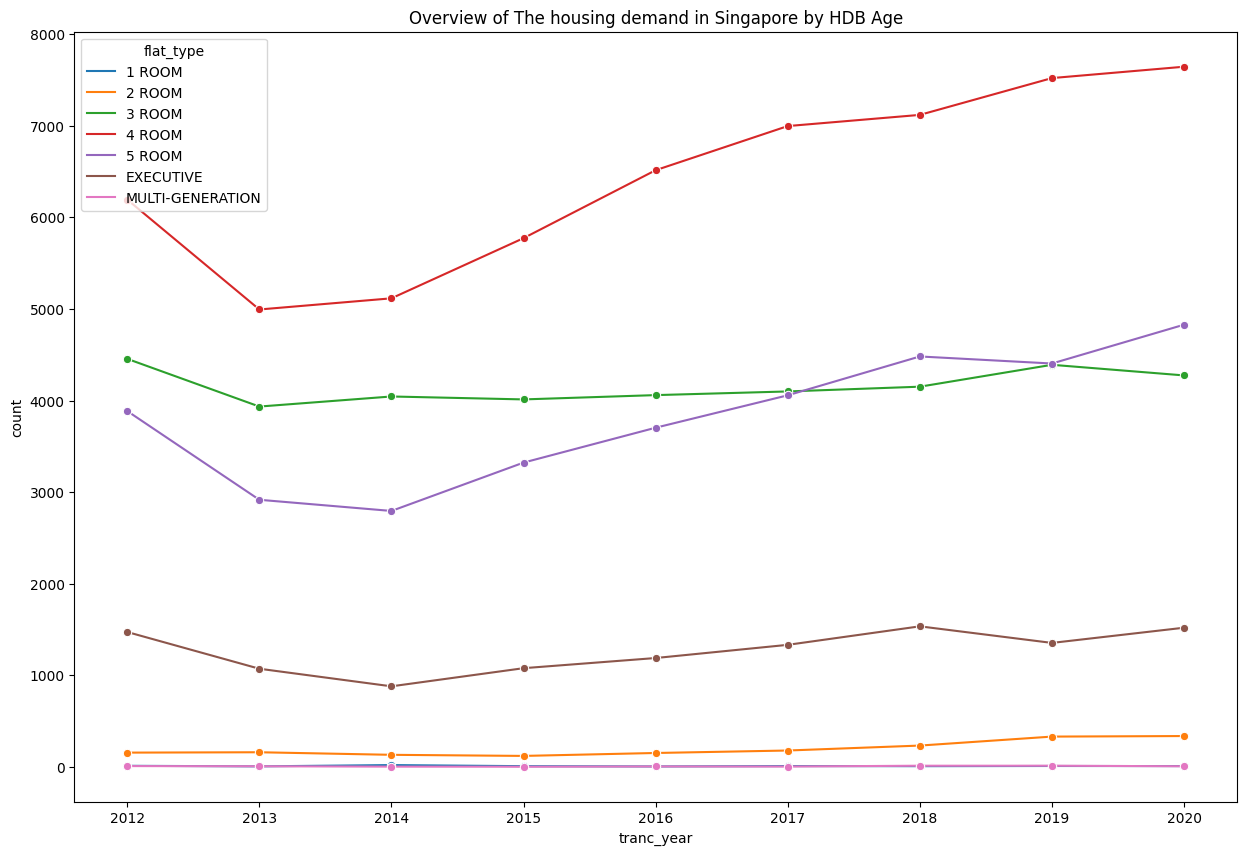

In [24]:
range_5_years = list(range(2012,2021,1))

df = housing[housing['tranc_year'].isin(range_5_years)]

plt.figure(figsize = (15, 10))
df = df.groupby(['tranc_year','flat_type']).size().reset_index(name='count')
sns.lineplot(x = "tranc_year", y = "count", marker='o', data = df, hue = 'flat_type')
plt.title('Overview of The housing demand in Singapore by HDB Age')
plt.show()

The popularity of 5-room and 4-room units has shown a steady increase from 2014 to 2020, whereas the demand for other types of rooms appears to have remained relatively stable.

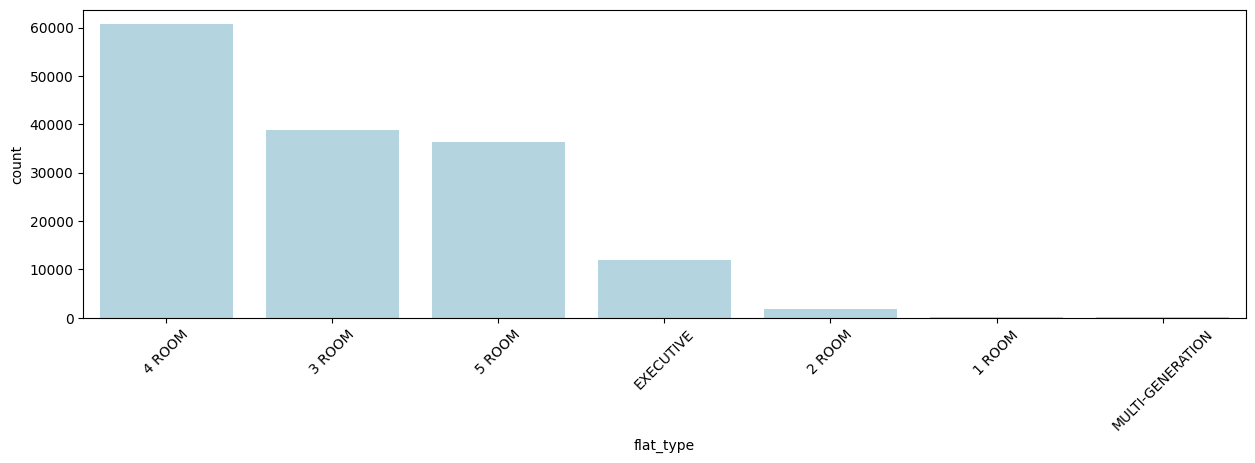

In [25]:
plt.figure(figsize = (15, 4))
flat_order = housing['flat_type'].value_counts().index
sns.countplot(data=housing, x='flat_type', order=flat_order ,color = 'lightblue')
plt.xticks(rotation=45) 
plt.show()

Overall,the higest demand were 4 room, followed by 3 room and 5 room.

### Avergae Resale Price by Floor Area Sqft

In [26]:
df = housing.groupby('flat_type').agg({'resale_price':np.mean,'floor_area_sqft': np.mean}).sort_values(by='resale_price', ascending=False).reset_index()
df

,flat_type,resale_price,floor_area_sqft
0,MULTI-GENERATION,767992.000000,1735.695000
1,EXECUTIVE,633933.020306,1551.621709
2,5 ROOM,536760.130100,1272.513829
3,4 ROOM,444244.851671,1029.739621
4,3 ROOM,326326.800662,734.134432
5,2 ROOM,245532.248543,492.765310
6,1 ROOM,207015.463415,333.684000


In general, the higher the floor area sqft, the higher the average resale price.

However, the flat model notably impacts the resale price. As depicted below, a similar trend is observed across other flat types . For instance, despite the 5-room premium apartment loft having a larger floor area (sqft) compared to Type S2, the average resale price for Type S2 surpasses that of the premium apartment loft. Thus, model should be inculded as one of the feature selection for the multi regression model. 

In [27]:
df = housing[housing['flat_type'] == '5 ROOM'].groupby(['flat_type','flat_model']).agg({
    'resale_price':np.mean,'floor_area_sqft': np.mean}).sort_values(by='resale_price', ascending=False).reset_index()
df

,flat_type,flat_model,resale_price,floor_area_sqft
0,5 ROOM,Type S2,1.019220e+06,1142.340094
1,5 ROOM,Premium Apartment Loft,8.483269e+05,1593.072000
2,5 ROOM,DBSS,8.387412e+05,1204.881998
3,5 ROOM,Model A-Maisonette,6.978675e+05,1517.066656
4,5 ROOM,Improved-Maisonette,6.775731e+05,1461.637895
5,5 ROOM,Adjoined flat,6.679009e+05,1457.664000
6,5 ROOM,Standard,6.189874e+05,1280.003039
7,5 ROOM,Model A,5.545959e+05,1446.740383
8,5 ROOM,Improved,5.242627e+05,1268.291054
9,5 ROOM,Premium Apartment,4.927495e+05,1224.166967


In [28]:
df = housing[housing['flat_type'] == '4 ROOM'].groupby(['flat_type','flat_model']).agg({
    'resale_price':np.mean,'floor_area_sqft': np.mean}).sort_values(by='resale_price', ascending=False).reset_index()
df

,flat_type,flat_model,resale_price,floor_area_sqft
0,4 ROOM,Type S1,905042.169421,1015.730182
1,4 ROOM,Premium Apartment Loft,890021.555556,1054.274000
2,4 ROOM,Terrace,889888.888889,1233.076000
3,4 ROOM,DBSS,695859.234114,968.292000
4,4 ROOM,Adjoined flat,609037.000000,1255.800000
5,4 ROOM,Premium Apartment,455098.898772,1020.842858
6,4 ROOM,Model A,454550.215074,1067.722260
7,4 ROOM,Standard,452433.476923,833.348880
8,4 ROOM,Improved,446608.855441,916.807236
9,4 ROOM,New Generation,417618.923809,1002.752762


In [29]:
df = housing[housing['flat_type'] == '3 ROOM'].groupby(['flat_type','flat_model']).agg({
    'resale_price':np.mean,'floor_area_sqft': np.mean}).sort_values(by='resale_price', ascending=False).reset_index()
df

,flat_type,flat_model,resale_price,floor_area_sqft
0,3 ROOM,Terrace,810827.080000,1172.024372
1,3 ROOM,DBSS,505980.813559,708.113085
2,3 ROOM,Premium Apartment,394887.846547,727.767529
3,3 ROOM,Model A,345450.375271,772.385122
4,3 ROOM,New Generation,319581.198163,751.885087
5,3 ROOM,Improved,318593.725196,701.860533
6,3 ROOM,Simplified,308885.323484,692.930407
7,3 ROOM,Standard,308825.998807,650.958662


In [30]:
df = housing[housing['flat_type'] == '2 ROOM'].groupby(['flat_type','flat_model']).agg({
    'resale_price':np.mean,'floor_area_sqft': np.mean}).sort_values(by='resale_price', ascending=False).reset_index()
df

,flat_type,flat_model,resale_price,floor_area_sqft
0,2 ROOM,DBSS,300000.000000,538.200000
1,2 ROOM,Premium Apartment,252648.648649,557.400649
2,2 ROOM,Model A,249053.773973,499.198932
3,2 ROOM,2-room,248000.000000,546.273000
4,2 ROOM,Improved,243396.840691,488.842618
5,2 ROOM,Standard,242525.831650,483.836364


In [31]:
df = housing[housing['flat_type'] == '1 ROOM'].groupby(['flat_type','flat_model']).agg({
    'resale_price':np.mean,'floor_area_sqft': np.mean}).sort_values(by='resale_price', ascending=False).reset_index()
df

,flat_type,flat_model,resale_price,floor_area_sqft
0,1 ROOM,Improved,207015.463415,333.684


### Total Demand by Region

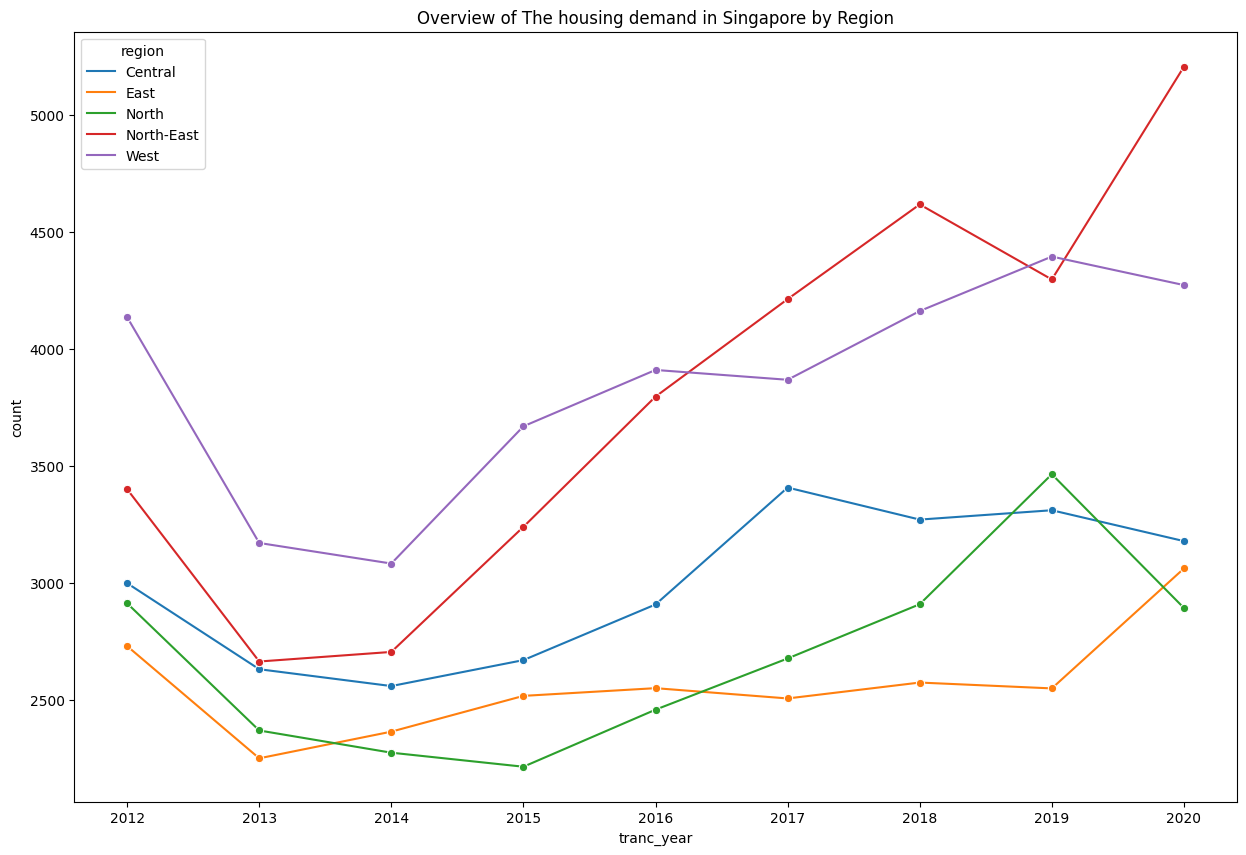

In [32]:
range_5_years = list(range(2012,2021,1))

df = housing[housing['tranc_year'].isin(range_5_years)]

plt.figure(figsize = (15, 10))
df = df.groupby(['tranc_year','region']).size().reset_index(name='count')
sns.lineplot(x = "tranc_year", y = "count", marker='o', data = df, hue = 'region')
plt.title('Overview of The housing demand in Singapore by Region')
plt.show()

North-East has the highest increased in demand between 2014 to 2020.

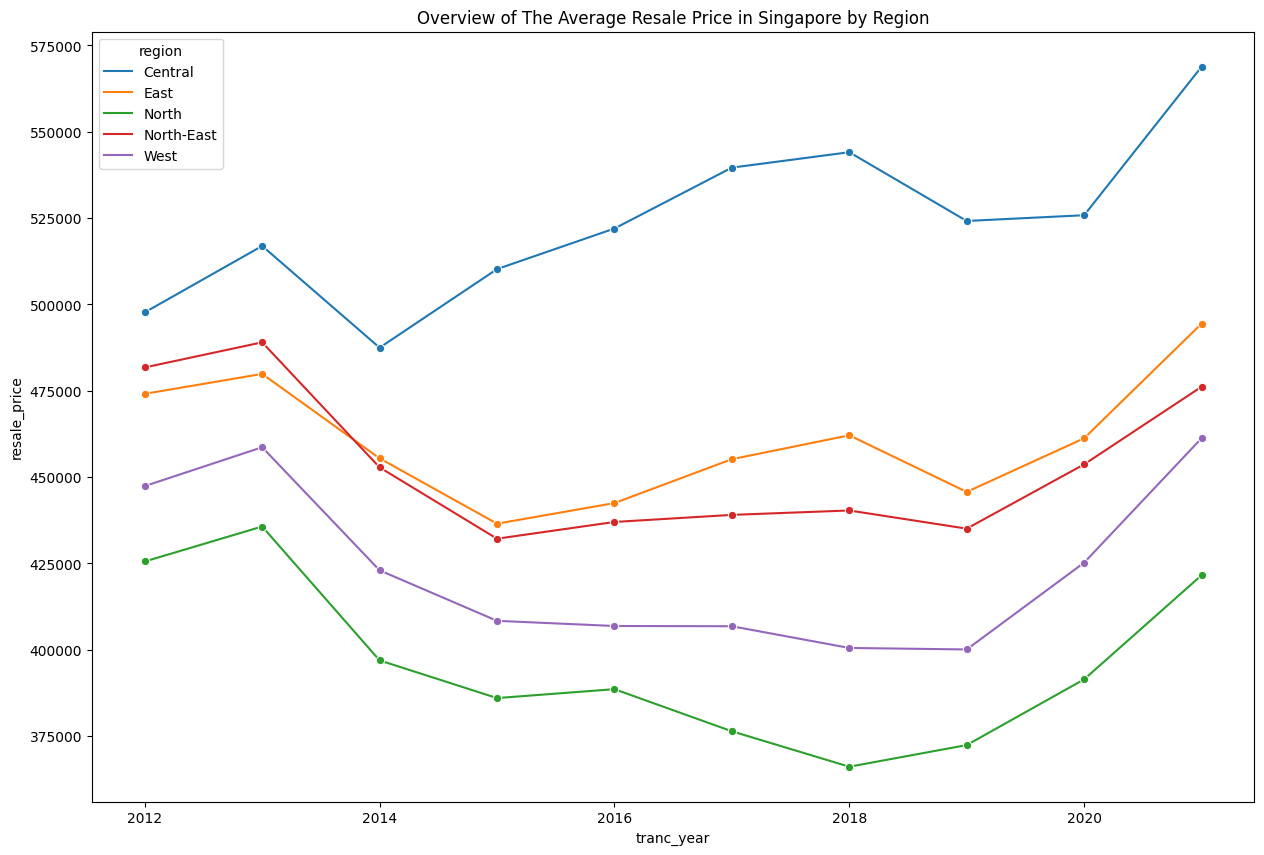

In [33]:
plt.figure(figsize = (15, 10))
df = housing.groupby(['tranc_year','region']).agg({'resale_price': 'mean'}).reset_index()
sns.lineplot(x = "tranc_year", y = "resale_price", marker='o', data = df, hue = 'region')
plt.title('Overview of The Average Resale Price in Singapore by Region')
plt.show()

Central has the higher increased in average resale price between 2014 to 2018.

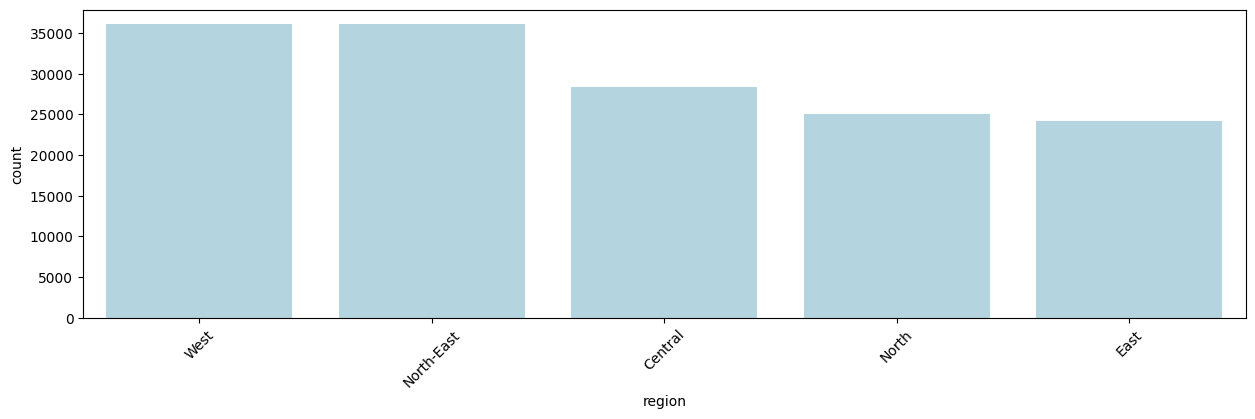

In [34]:
plt.figure(figsize = (15, 4))
region_order = housing['region'].value_counts().index
sns.countplot(data=housing, x='region',color = 'lightblue', order = region_order)
plt.xticks(rotation=45) 
plt.show()

West is the most popular region while East is the least popular region

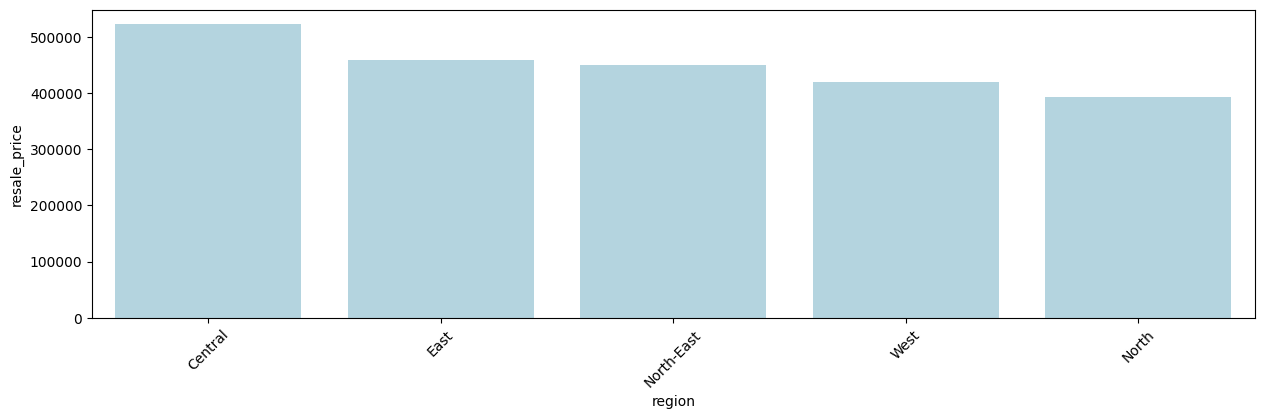

In [35]:
plt.figure(figsize = (15, 4))
df = housing.groupby(['region']).agg({'resale_price': np.mean}).sort_values(by='resale_price', ascending=False).reset_index()
sns.barplot(data=df, x='region', y='resale_price', color='lightblue')
plt.xticks(rotation=45) 
plt.show()

Central is the most expensive region based on average resale price while North is the least expensive region

### The Most Popular Planning Area by Demand

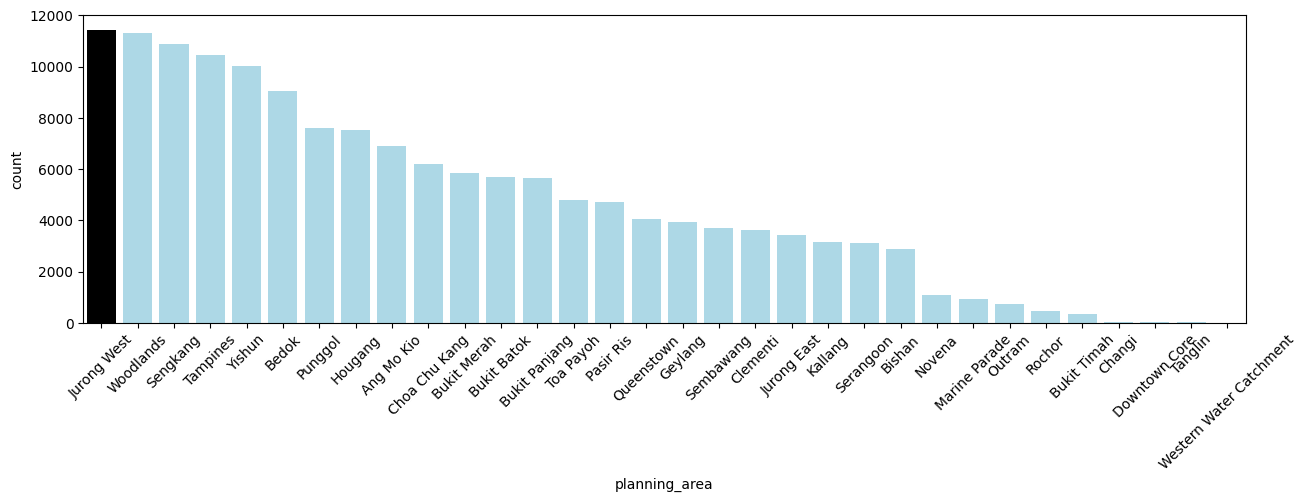

In [36]:
plt.figure(figsize = (15, 4))
town_order = housing['planning_area'].value_counts().index
sns.countplot(data=housing, x='planning_area', order=town_order)

bars = plt.gca().patches 
first_bar = bars[0]
last_bar = bars[-1]
middle_bars = bars[1:-1]

first_bar.set_facecolor('black')
last_bar.set_facecolor('black')

for bar in middle_bars:
    bar.set_facecolor('lightblue')

plt.xticks(rotation=45) 
plt.show()

Jurong West is the most popular planning area, followed by Woodlands and Sengkang

### The Most and least Expensive Planning Area by Average Resale Price

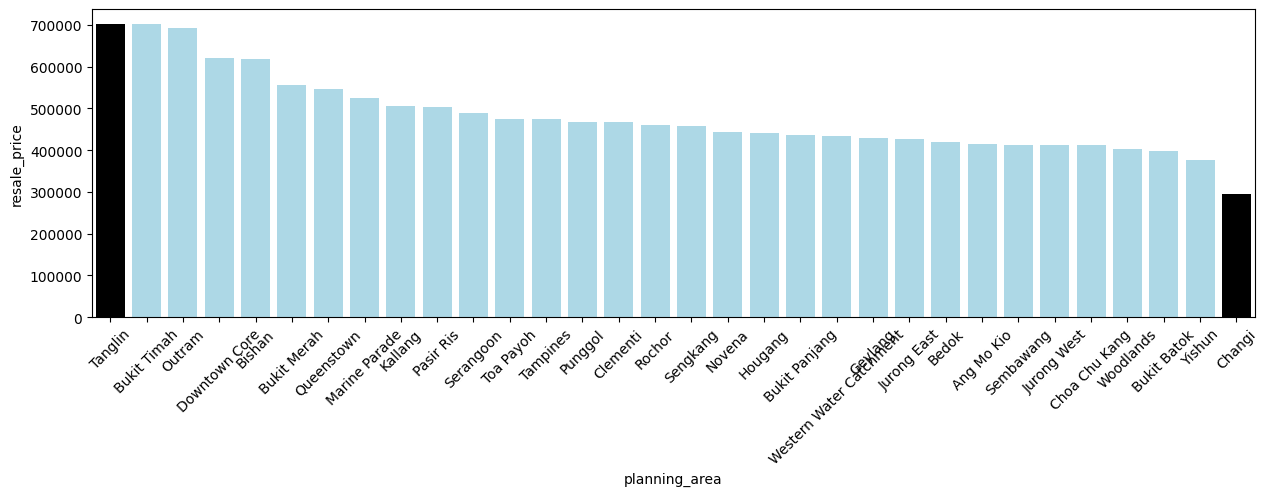

In [37]:
plt.figure(figsize = (15, 4))

df = housing.groupby('planning_area').agg({'resale_price' : np.mean}).sort_values(by='resale_price', ascending=False).reset_index()
sns.barplot(data=df, x='planning_area', y = 'resale_price' )

bars = plt.gca().patches 
first_bar = bars[0]
last_bar = bars[-1]
middle_bars = bars[1:-1]

first_bar.set_facecolor('black')
last_bar.set_facecolor('black')

for bar in middle_bars:
    bar.set_facecolor('lightblue')

plt.xticks(rotation=45) 
plt.show()

Tanglin is the most expensive based on average selling price, followed by Bukit Timah and Outram. From the bottom 3, we have Bukit Batok, Yishun and Changi

### Growth Rate

### Growth Rate by Flat Type

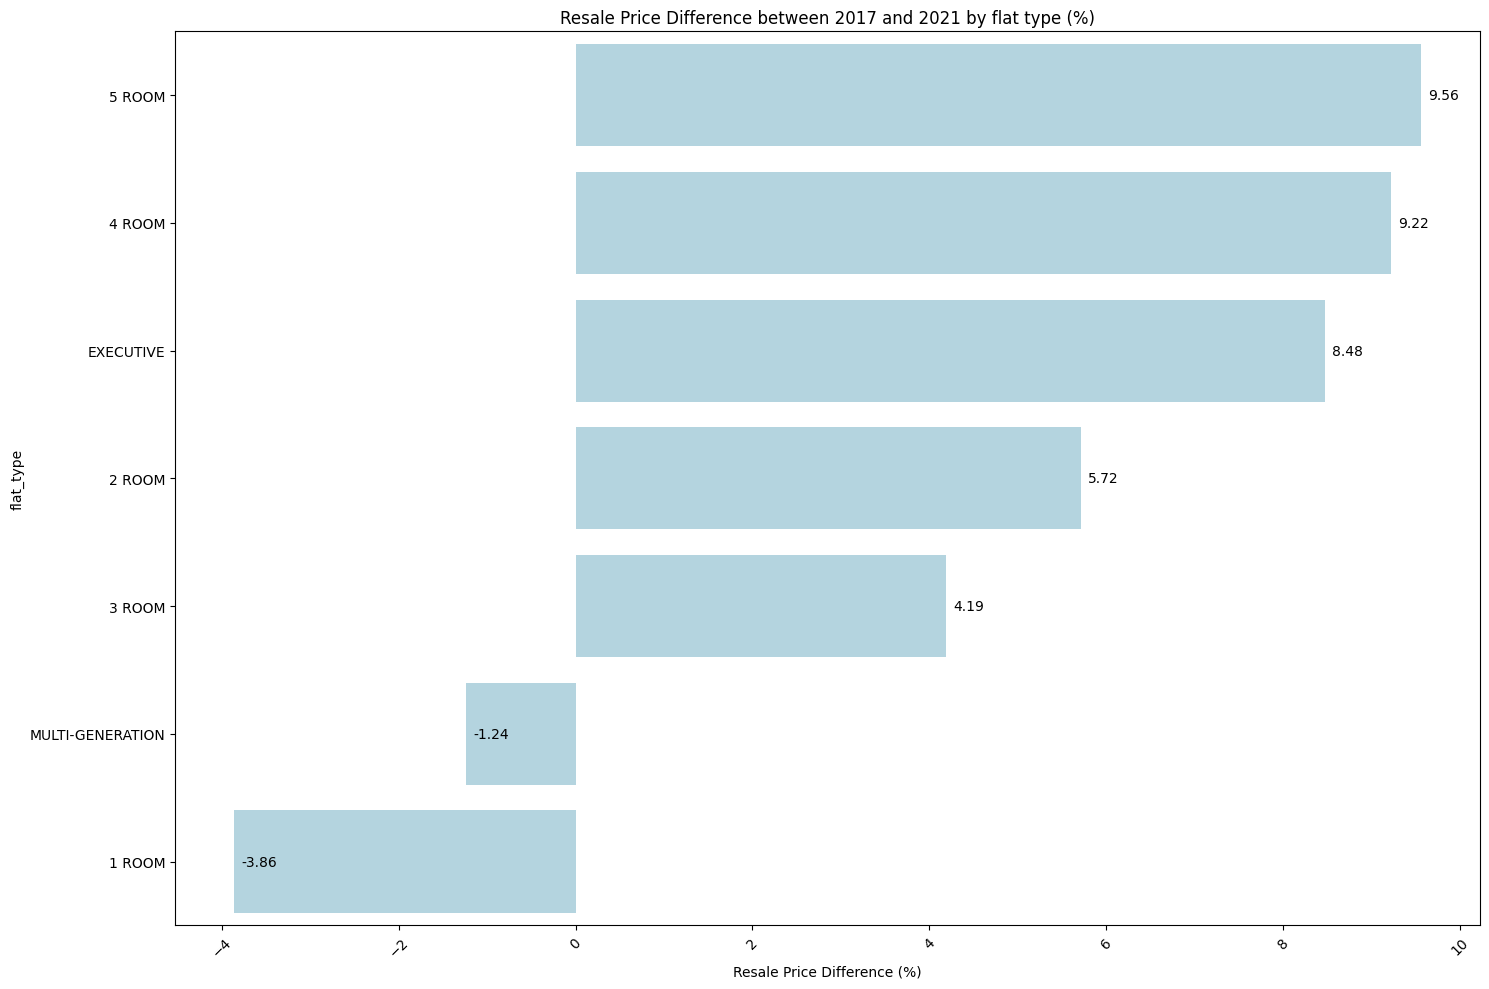

In [38]:
df_recent_5_years = housing[housing['tranc_year'].isin([2017,2021])]

# Group by 'planning_area' and calculate the difference between 2021 and 2017 resale prices for each group
output_df = df_recent_5_years.groupby(['flat_type']).apply(lambda x: (((x[x['tranc_year']==2021]['resale_price'].mean())
                                                                         - x[x['tranc_year']==2017]['resale_price'].mean())
                                                                 /x[x['tranc_year']==2017]['resale_price'].mean()*100)).reset_index(name='resale_price_difference')

output_df = output_df.sort_values(by = 'resale_price_difference', ascending = False)

plt.figure(figsize = (15,10))

# Plot the barplot
ax = sns.barplot(data=output_df, x='resale_price_difference', y='flat_type', color='lightblue')

# Add annotations (bar values)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.xticks(rotation=45)
plt.xlabel('Resale Price Difference (%)')
plt.ylabel('flat_type')
plt.title('Resale Price Difference between 2017 and 2021 by flat type (%)')
plt.tight_layout()
plt.show()

5 Room having the highest growth rate when we compared 2021 average resale price to 2017, followed by 4 room and Executive.

### Growth Rate by Planning Area for 4 Room Flat Type

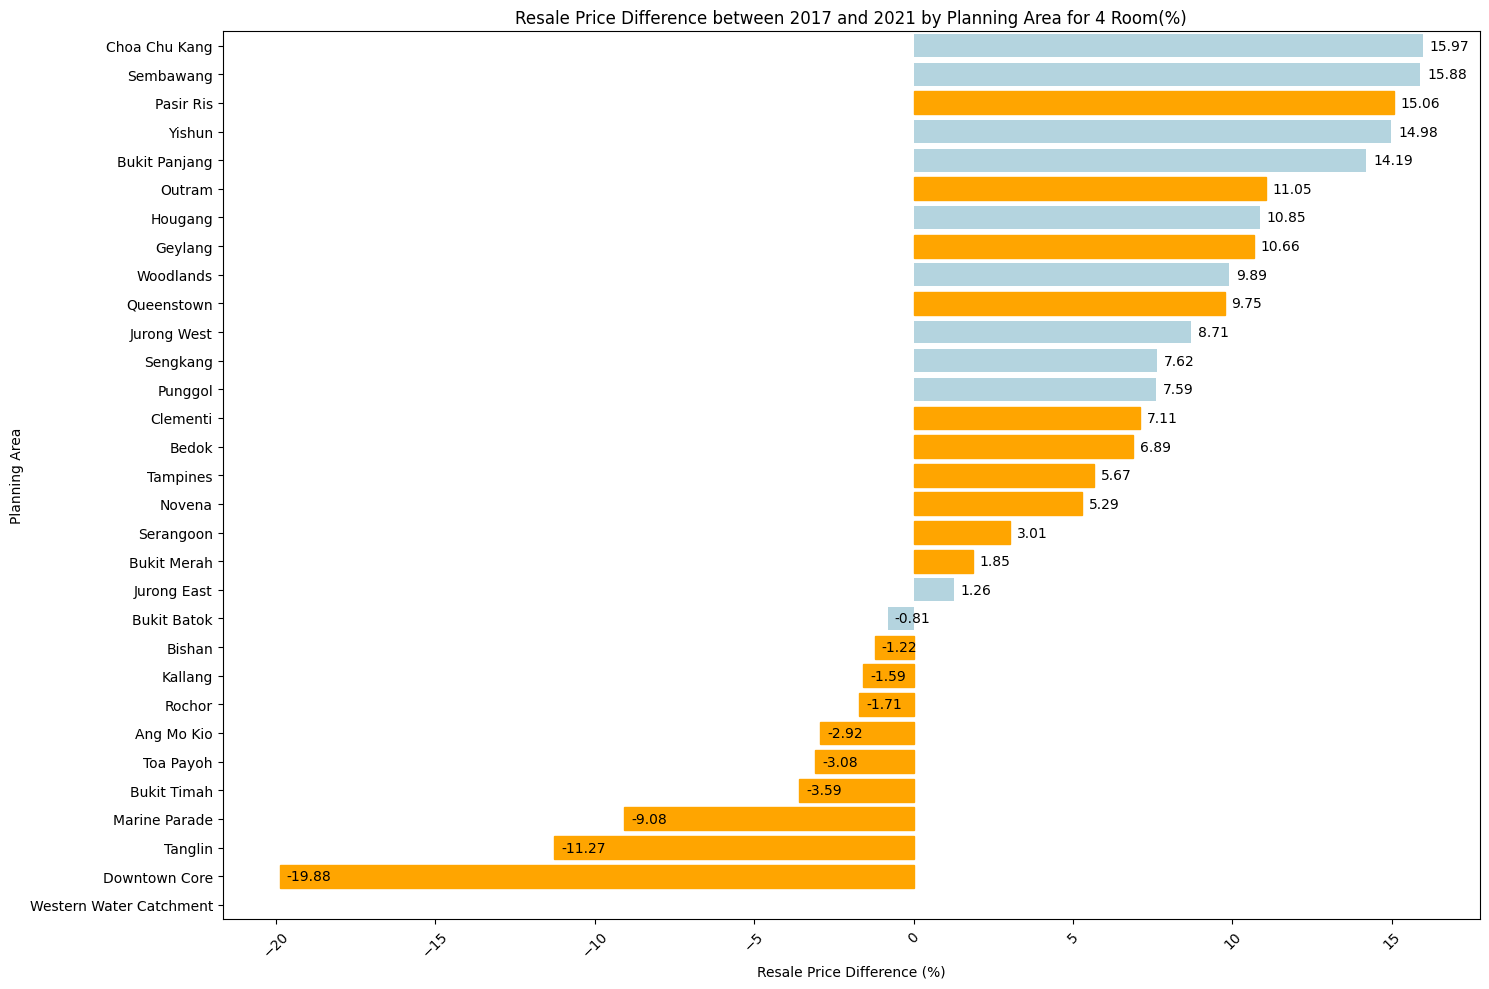

In [39]:
df_recent_5_years = housing[(housing['tranc_year'].isin([2017,2021])) & (housing['flat_type'] == '4 ROOM')] 

# Group by 'planning_area' and calculate the difference between 2021 and 2017 resale prices for each group
output_df = df_recent_5_years.groupby(['mature','planning_area']).apply(lambda x: (((x[x['tranc_year']==2021]['resale_price'].mean())
                                                                         - x[x['tranc_year']==2017]['resale_price'].mean())
                                                                 /x[x['tranc_year']==2017]['resale_price'].mean()*100)).reset_index(name='resale_price_difference')

output_df = output_df.sort_values(by = 'resale_price_difference', ascending = False)

plt.figure(figsize = (15,10))

# Plot the barplot
ax = sns.barplot(data=output_df, x='resale_price_difference', y='planning_area', color='lightblue')

# Color the bars for 'centre' region differently
for bar, mature in zip(ax.patches, output_df['mature']):
    if mature == 1:
        bar.set_color('orange')

# Add annotations (bar values)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.xticks(rotation=45)
plt.xlabel('Resale Price Difference (%)')
plt.ylabel('Planning Area')
plt.title('Resale Price Difference between 2017 and 2021 by Planning Area for 4 Room(%)')
plt.tight_layout()
plt.show()

The orange bars represent mature estates, while the blue bars represent non-mature estates. Among the estates showing a negative growth rate when comparing the average resale price in 2021 to that in 2017, all belong to the mature area. Choa Chu Kang exhibited the highest growth rate of 15.97%, followed by Sembawang (15.88%) and Pasir Ris (15.06%).

### YoY% Change in Resale Price in Singapore by Mature vs Non-Mature Estate

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


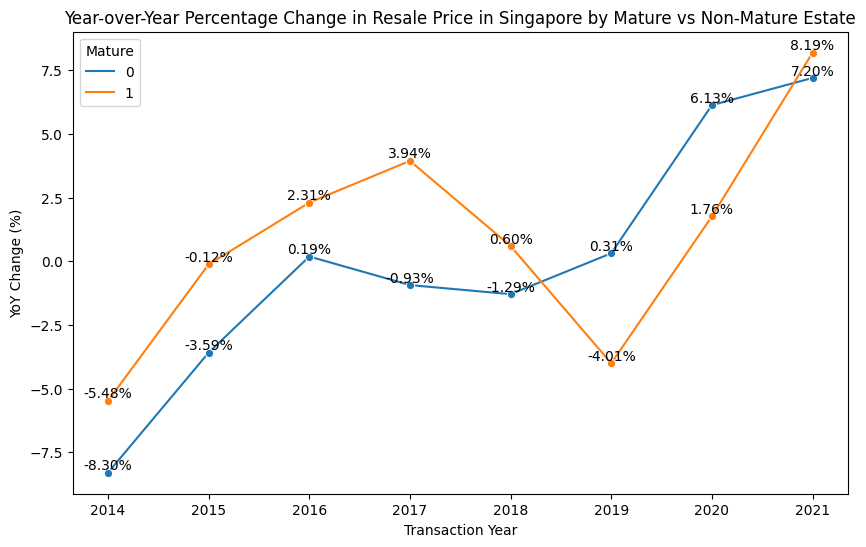

In [40]:
# Calculate the average resale price for each year and region
df = housing.groupby(['tranc_year', 'mature']).agg({'resale_price': 'mean'}).reset_index()

# Sort the DataFrame by region and transaction year in ascending order
df = df.sort_values(by=['mature', 'tranc_year'], ascending=True)

# Calculate the year-over-year percentage change for each region
df['YOY%'] = df.groupby('mature')['resale_price'].pct_change() * 100

# Filter out the year 2013
df = df[df['tranc_year'] != 2013]

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="tranc_year", y="YOY%", marker='o', data=df, hue='mature')

# Add labels to the data points
for _, row in df.iterrows():
    ax.text(row['tranc_year'], row['YOY%'], f"{row['YOY%']:.2f}%", ha='center', va='bottom')

plt.title('Year-over-Year Percentage Change in Resale Price in Singapore by Mature vs Non-Mature Estate')
plt.xlabel('Transaction Year')
plt.ylabel('YoY Change (%)')
plt.legend(title='Mature')
plt.grid(False)
plt.show()

Noticable dip in 2019 for muture estate and a lower YOY% growth rate from 2019 to 2020 as compared to non-mature estate.

### Is Central The Best Area to Invest ?

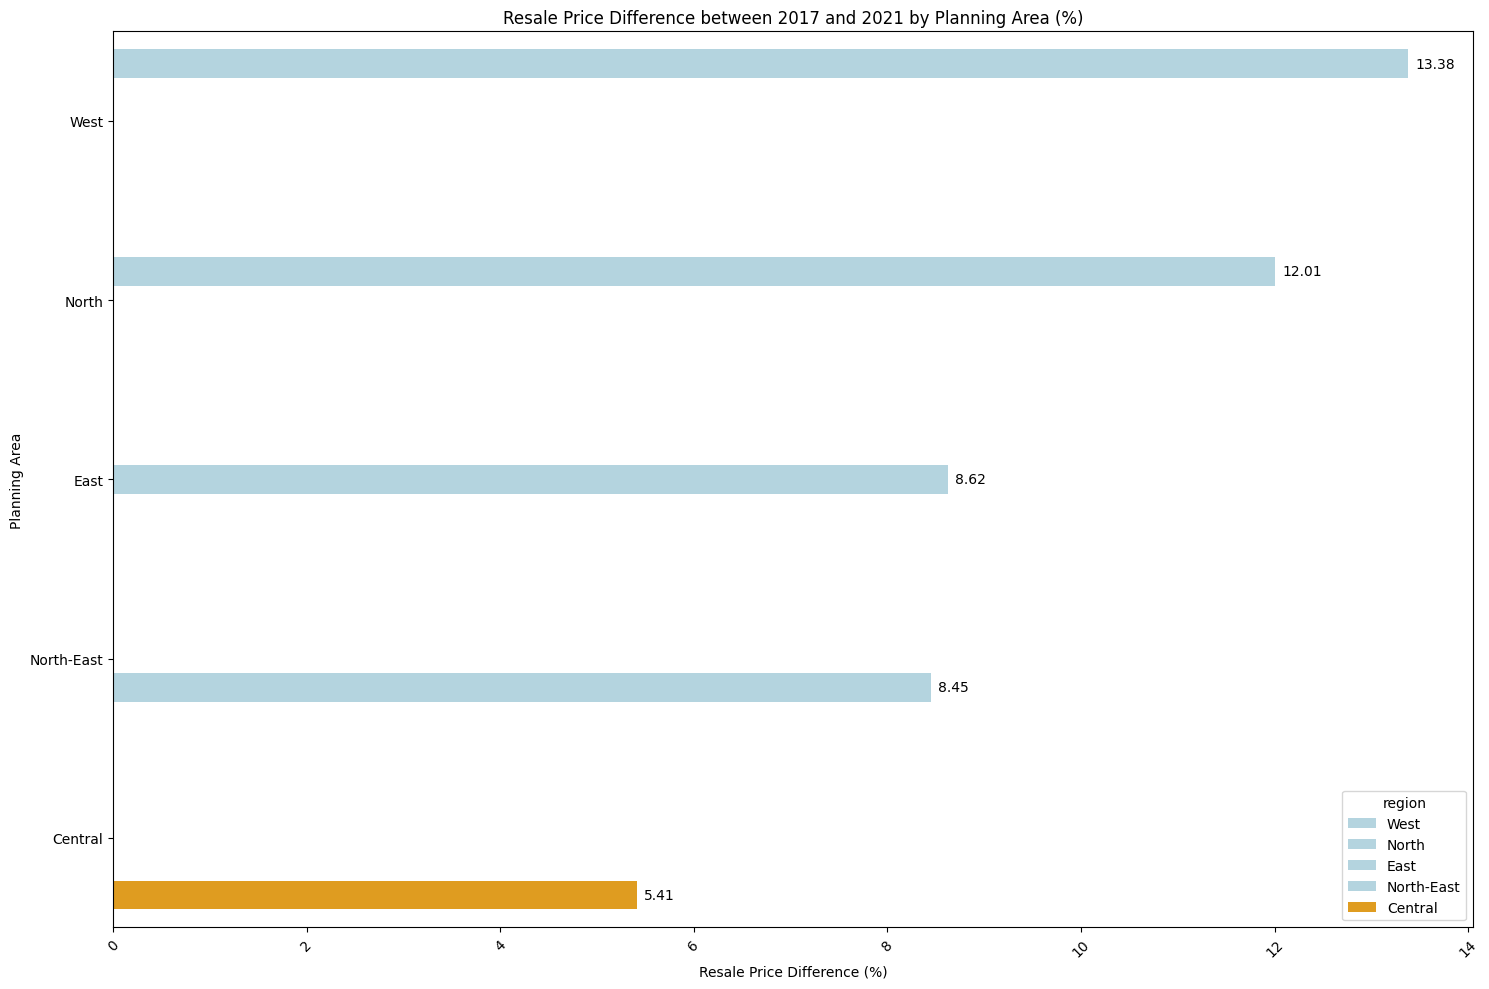

In [41]:
region_colors = {'Central': 'orange', 'East': 'lightblue', 'North': 'lightblue', 'North-East': 'lightblue', 'West': 'lightblue'}

# Group by 'planning_area' and calculate the difference between 2021 and 2017 resale prices for each group
output_df = housing.groupby(['region']).apply(lambda x: (((x[x['tranc_year']==2021]['resale_price'].mean())
                                                                         - x[x['tranc_year']==2017]['resale_price'].mean())
                                                                 /x[x['tranc_year']==2017]['resale_price'].mean()*100)).reset_index(name='resale_price_difference')

output_df = output_df.sort_values(by = 'resale_price_difference', ascending = False)

plt.figure(figsize = (15,10))

# Plot the barplot
ax = sns.barplot(data=output_df, x='resale_price_difference', y='region', hue='region', palette=region_colors)


# Add annotations (bar values)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.xticks(rotation=45)
plt.xlabel('Resale Price Difference (%)')
plt.ylabel('Planning Area')
plt.title('Resale Price Difference between 2017 and 2021 by Planning Area (%)')
plt.tight_layout()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


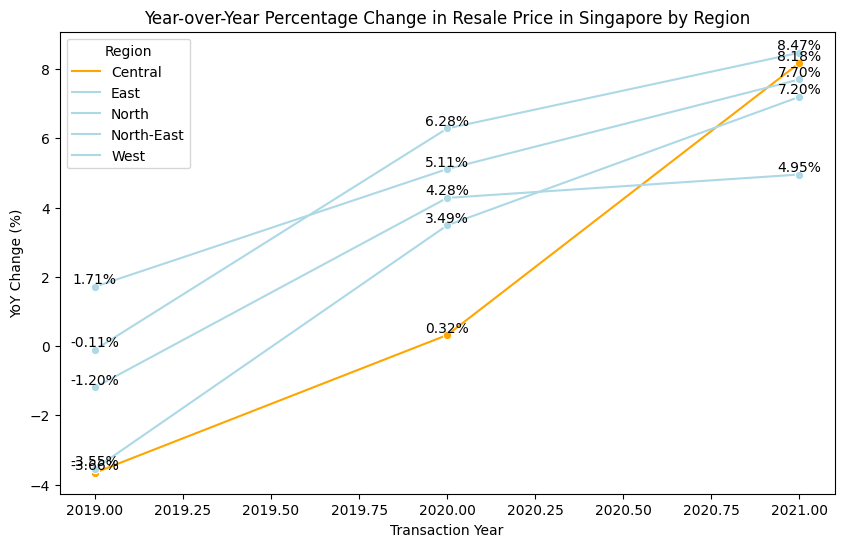

In [42]:
# Set color palette for regions (all blue except 'central' which is orange)
range_5_years = list(range(2018,2022,1))

df = housing[housing['tranc_year'].isin(range_5_years)]


# Calculate the average resale price for each year and region
df_1 = df.groupby(['tranc_year', 'region']).agg({'resale_price': 'mean'}).reset_index()

# Sort the DataFrame by region and transaction year in ascending order
df_1 = df_1.sort_values(by=['region', 'tranc_year'], ascending=True)

# Calculate the year-over-year percentage change for each region
df_1['YOY%'] = df_1.groupby('region')['resale_price'].pct_change() * 100

# Filter out the year 2013
df_1 = df_1[df_1['tranc_year'] != 2013]

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="tranc_year", y="YOY%", marker='o', data=df_1, hue='region', palette=region_colors)

# Add labels to the data points
for _, row in df_1.iterrows():
    ax.text(row['tranc_year'], row['YOY%'], f"{row['YOY%']:.2f}%", ha='center', va='bottom')

plt.title('Year-over-Year Percentage Change in Resale Price in Singapore by Region')
plt.xlabel('Transaction Year')
plt.ylabel('YoY Change (%)')
plt.legend(title='Region')
plt.grid(False)
plt.show()


According to the charts provided above, the Central region might not be the ideal investment location, with the lowest five-year growth rate recorded at only 5.41%. Conversely, the West region boasted the highest growth rate of 13.38%. This could be attributed to its lower year-over-year percentage growth rate from 2019 to 2020 compared to other regions.

### Where is The Best Planning Area to invest?

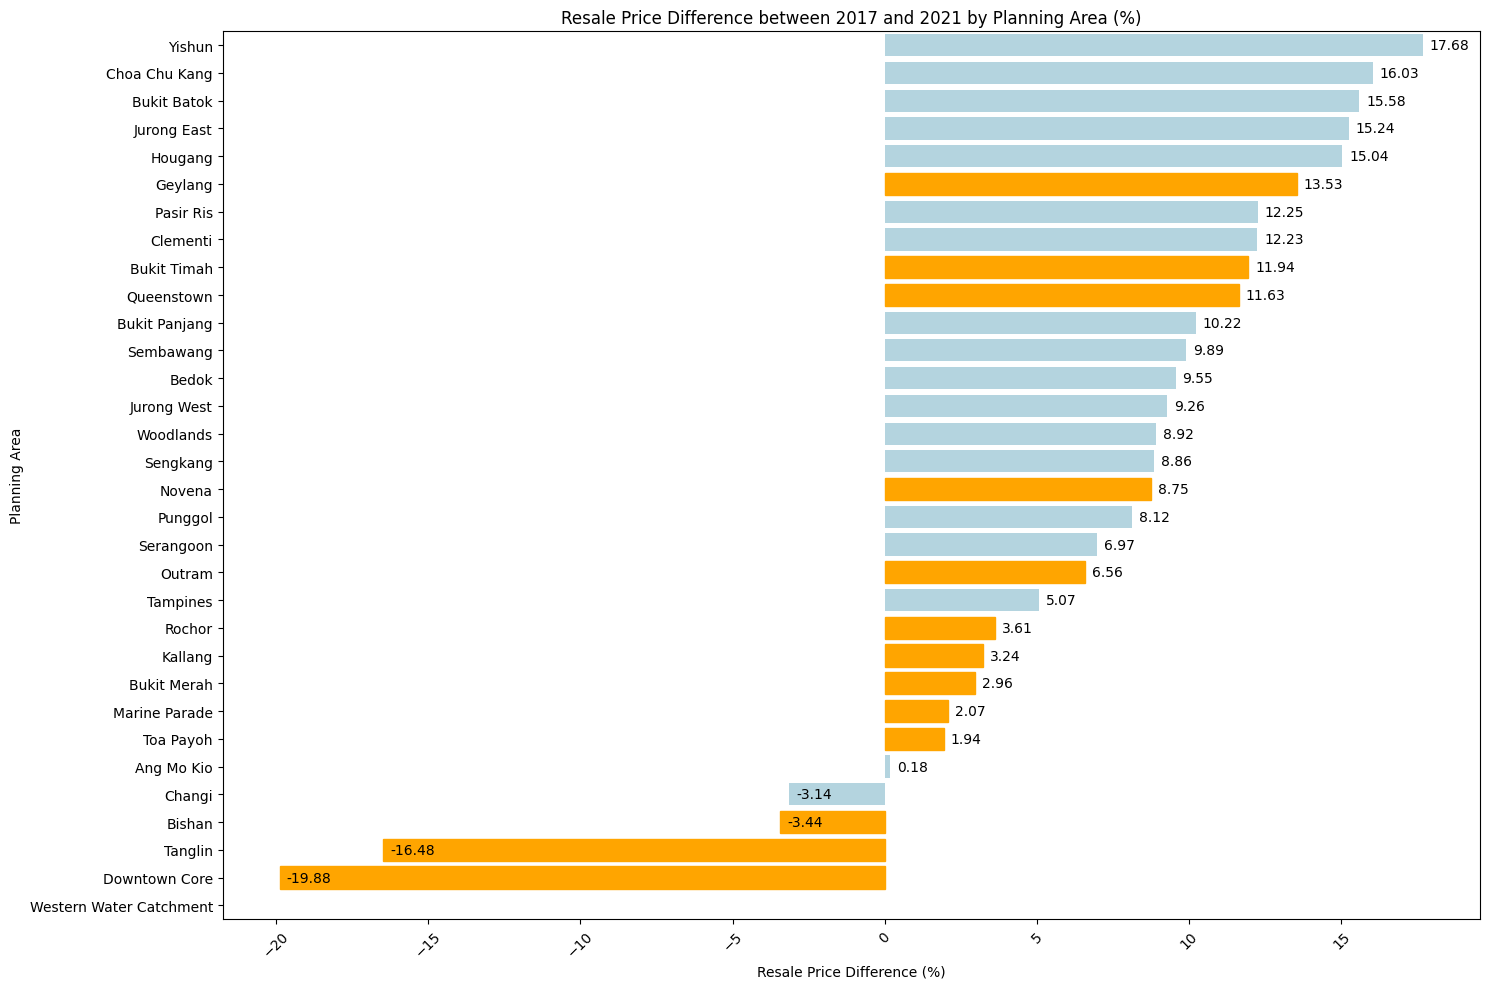

In [43]:
df_recent_5_years = housing[housing['tranc_year'].isin([2017,2021])]

# Group by 'planning_area' and calculate the difference between 2021 and 2017 resale prices for each group
output_df = df_recent_5_years.groupby(['region','planning_area']).apply(lambda x: (((x[x['tranc_year']==2021]['resale_price'].mean())
                                                                         - x[x['tranc_year']==2017]['resale_price'].mean())
                                                                 /x[x['tranc_year']==2017]['resale_price'].mean()*100)).reset_index(name='resale_price_difference')

output_df = output_df.sort_values(by = 'resale_price_difference', ascending = False)

plt.figure(figsize = (15,10))

# Plot the barplot
ax = sns.barplot(data=output_df, x='resale_price_difference', y='planning_area', color='lightblue')

# Color the bars for 'centre' region differently
for bar, region in zip(ax.patches, output_df['region']):
    if region == 'Central':
        bar.set_color('orange')

# Add annotations (bar values)
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_width(), p.get_y() + p.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')

plt.xticks(rotation=45)
plt.xlabel('Resale Price Difference (%)')
plt.ylabel('Planning Area')
plt.title('Resale Price Difference between 2017 and 2021 by Planning Area (%)')
plt.tight_layout()
plt.show()

With a growth of 17.7%, Yishun experienced the highest increase in average resales price  from 2017 to 2021. This surge could be attributed to development projects like Northpoint City and HometeamNS Khatib. Following closely are Choa Chu Kang and Bukit Batok, experiencing increases of 16.0% and 15.6% respectively. Interestingly, many planning areas in the central region fall below the average growth rate, including Kallang, Bukit Merah, Marine Parade, and Toa Payoh. Moreover, certain central planning areas even witnessed a negative growth rate, notably Downtown Core, with a -19.9% decline. Most likely because the central area itself already more expensive to begin with, so with the same quantum increase, the percentage would be less compared to other areas with relatively cheaper price. Therefore, homeowners intending to use their property as an investment should avoid overlooking central areas unless they are aware of significant development or revitalization projects underway in the respective planning areas.

In [44]:
# Calculate the average resale price for each year and region
df = housing.groupby(['tranc_year','region', 'planning_area']).agg({'resale_price': 'mean'}).reset_index()

# Sort the DataFrame by region and transaction year in descending order
df = df.sort_values(by=['planning_area', 'tranc_year'], ascending=True)

# Calculate the year-over-year percentage change for each region
df['YOY%'] = df.groupby('planning_area')['resale_price'].pct_change() * 100

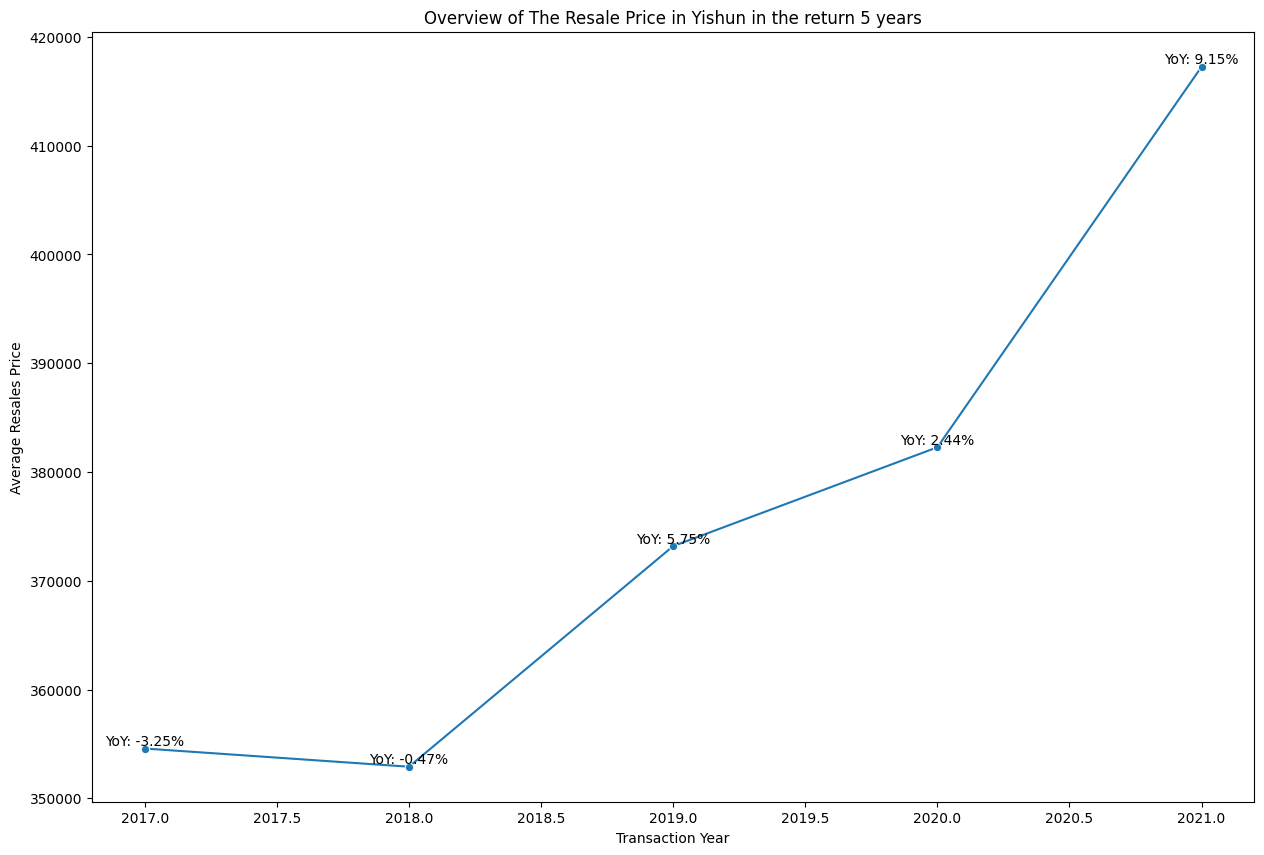

In [51]:
yishun = df[(df['tranc_year'].isin([2017, 2018, 2019, 2020, 2021])) & (df['planning_area'] == 'Yishun')]

plt.figure(figsize=(15, 10))

# Plot the lineplot
ax = sns.lineplot(x="tranc_year", y="resale_price", marker='o', data=yishun)

# Add labels to the data points
for _, row in yishun.iterrows():
    ax.text(row['tranc_year'], row['resale_price'], f"YoY: {row['YOY%']:.2f}%", ha='center', va='bottom')

plt.title('Overview of The Resale Price in Yishun in the return 5 years')
plt.xlabel('Transaction Year')
plt.ylabel('Average Resales Price')
plt.show()

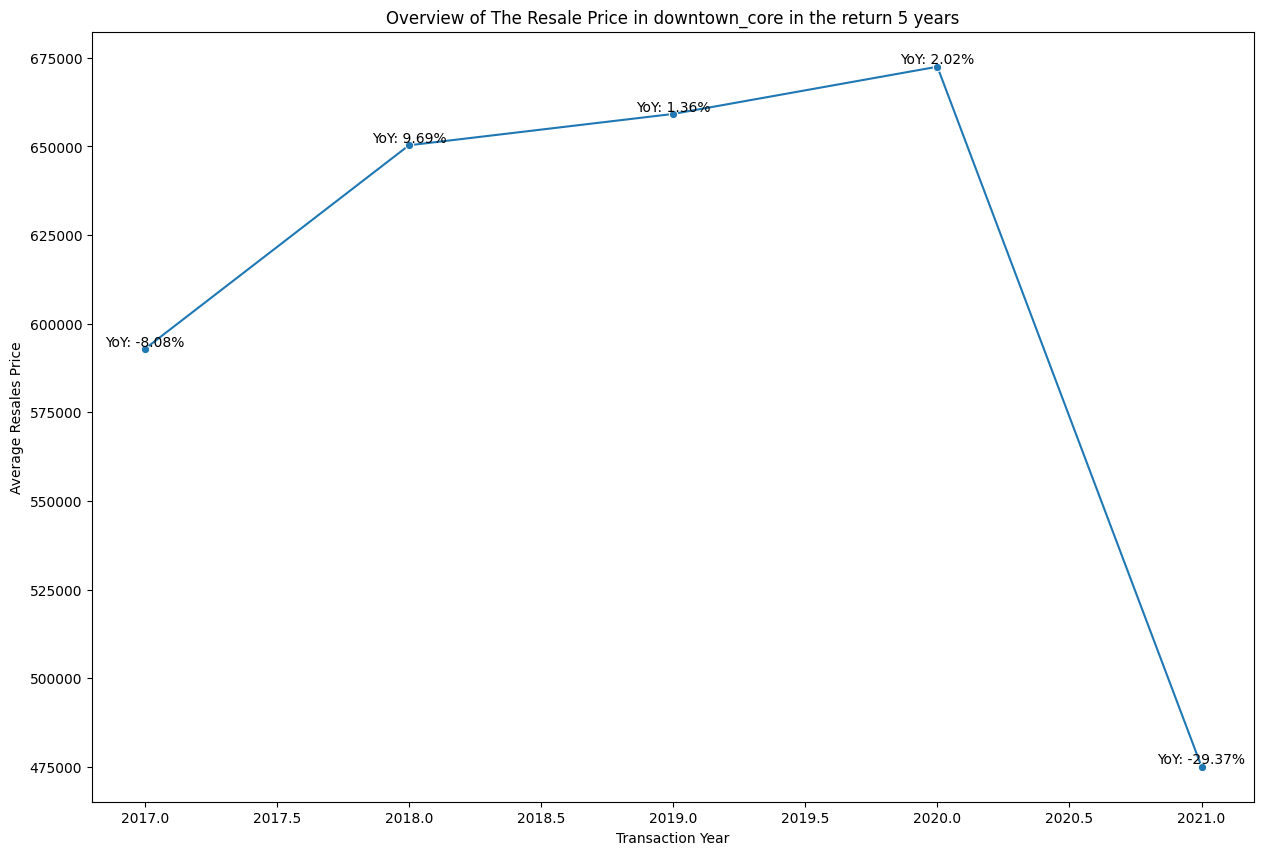

In [52]:
downtown_core = df[(df['tranc_year'].isin([2017, 2018, 2019, 2020, 2021])) & (df['planning_area'] == 'Downtown Core')]

plt.figure(figsize=(15, 10))

# Plot the lineplot
ax = sns.lineplot(x="tranc_year", y="resale_price", marker='o', data=downtown_core)

# Add labels to the data points
for _, row in downtown_core.iterrows():
    ax.text(row['tranc_year'], row['resale_price'], f"YoY: {row['YOY%']:.2f}%", ha='center', va='bottom')

plt.title('Overview of The Resale Price in downtown_core in the return 5 years')
plt.xlabel('Transaction Year')
plt.ylabel('Average Resales Price')
plt.show()

### Could Tengah really be the next Punggol?

Tengah, Singapore's first new HDB town in over 20 years since Punggol, it was a military restricted area until 2015. With Punggol as a reference, Homerowners can gauge the potential growth they might experience after residing for five years. Based on this comparison, homeowners can anticipate a return of 8% or higher.

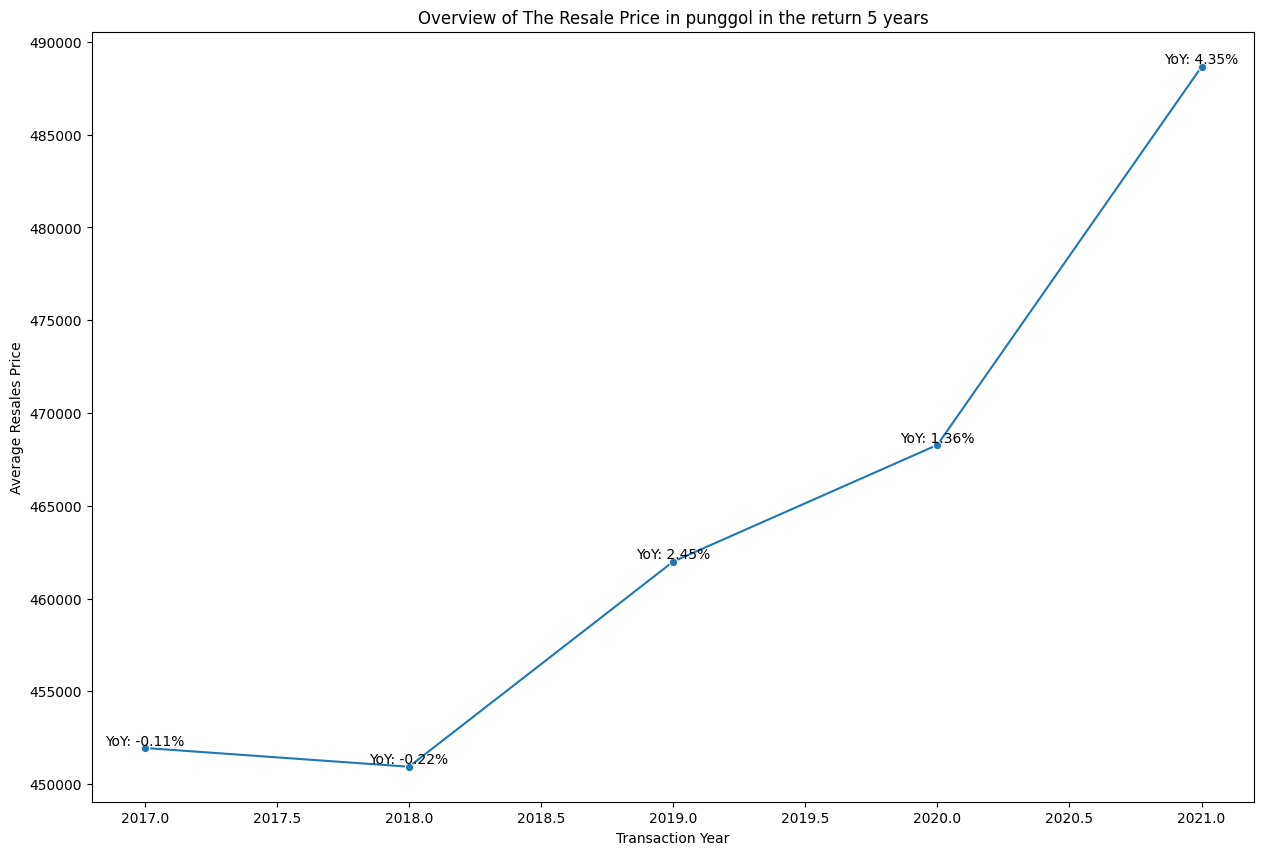

In [47]:
punggol = df[(df['tranc_year'].isin([2017, 2018, 2019, 2020, 2021])) & (df['planning_area'] == 'Punggol')]

plt.figure(figsize=(15, 10))

# Plot the lineplot
ax = sns.lineplot(x="tranc_year", y="resale_price", marker='o', data=punggol)

# Add labels to the data points
for _, row in punggol.iterrows():
    ax.text(row['tranc_year'], row['resale_price'], f"YoY: {row['YOY%']:.2f}%", ha='center', va='bottom')

plt.title('Overview of The Resale Price in punggol in the return 5 years')
plt.xlabel('Transaction Year')
plt.ylabel('Average Resales Price')
plt.show()

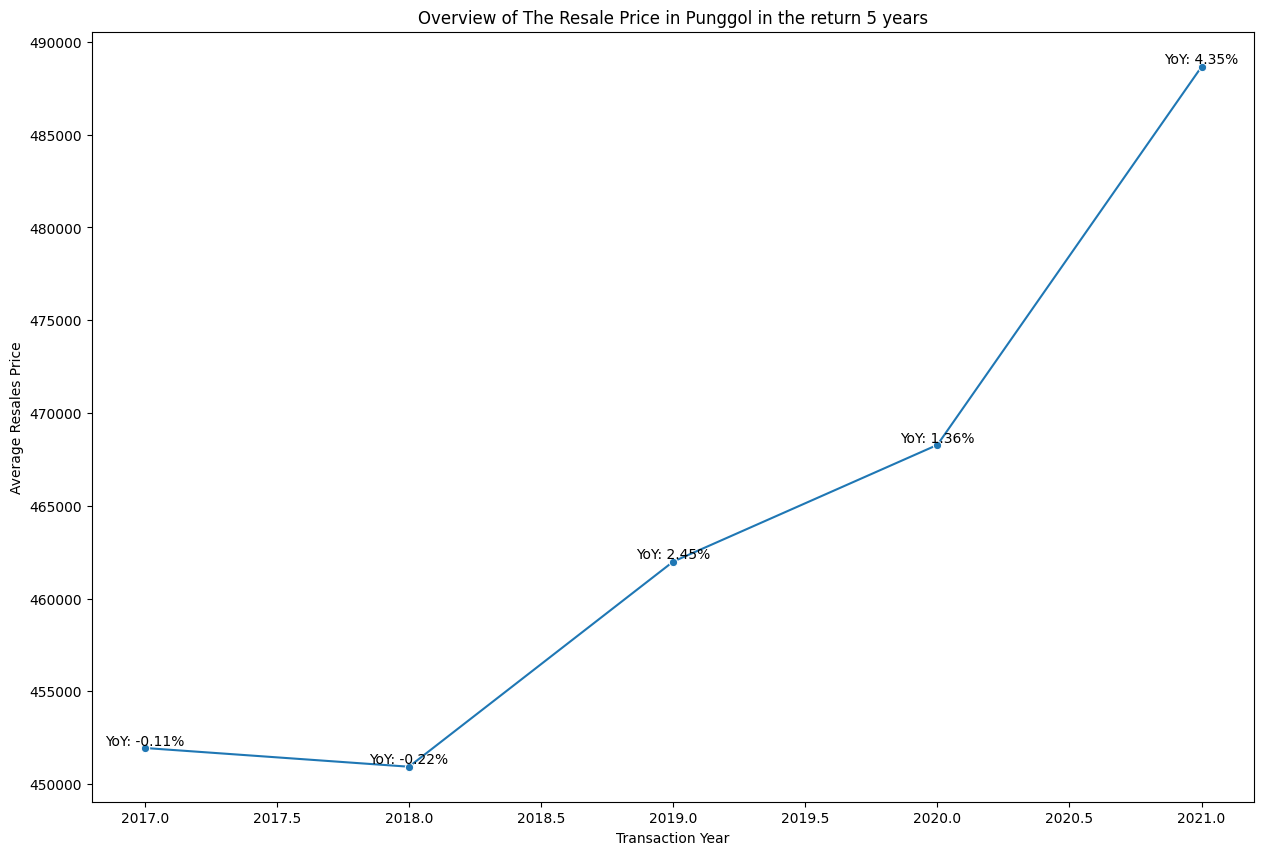

In [48]:
plt.figure(figsize=(15, 10))

# Plot the lineplot
ax = sns.lineplot(x="tranc_year", y="resale_price", marker='o', data=punggol)

# Add labels to the data points
for _, row in punggol.iterrows():
    ax.text(row['tranc_year'], row['resale_price'], f"YoY: {row['YOY%']:.2f}%", ha='center', va='bottom')

plt.title('Overview of The Resale Price in Punggol in the return 5 years')
plt.xlabel('Transaction Year')
plt.ylabel('Average Resales Price')
plt.show()

Since 2019, there has been a consistent positive year-over-year growth rate.

In [49]:
cols = housing.columns
cols_to_drop = ['tranc_yearmonth','tranc_year','tranc_month']
cols_for_corr_test = housing.drop(columns = cols_to_drop , inplace = False)


cols_for_corr_test.corr()['resale_price'].sort_values()

C:\Users\Jia Hui\AppData\Local\Temp\ipykernel_23516\3553634876.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols_for_corr_test.corr()['resale_price'].sort_values()


3room_sold                  -0.411948
hdb_age                     -0.348430
2room_sold                  -0.146455
total_dwelling_units        -0.144782
commercial                  -0.139708
mrt_nearest_distance        -0.127939
mall_nearest_distance       -0.087096
3room_rental                -0.080059
2room_rental                -0.077612
1room_sold                  -0.039488
1room_rental                -0.037992
hawker_food_stalls          -0.032899
vacancy                     -0.017042
hawker_nearest_distance     -0.016078
pri_sch_nearest_distance    -0.010871
hawker_market_stalls        -0.008555
multistorey_carpark         -0.007767
market_hawker               -0.005925
precinct_pavilion           -0.001367
affiliation                 -0.000645
bus_interchange              0.003277
hawker_within_500m           0.013037
other_room_rental            0.013143
bus_stop_nearest_distance    0.030546
pri_sch_affiliation          0.031328
cutoff_point                 0.036112
multigen_sol

In [50]:
cols_for_corr_test['resale_price_log'] = np.log(cols_for_corr_test['resale_price'])

cols_for_corr_test.corr()['resale_price_log'].sort_values()

C:\Users\Jia Hui\AppData\Local\Temp\ipykernel_23516\2567711761.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols_for_corr_test.corr()['resale_price_log'].sort_values()


3room_sold                  -0.467490
hdb_age                     -0.385765
total_dwelling_units        -0.194076
2room_sold                  -0.185311
commercial                  -0.143972
mrt_nearest_distance        -0.112107
mall_nearest_distance       -0.111651
2room_rental                -0.102422
3room_rental                -0.094057
1room_sold                  -0.056886
1room_rental                -0.049699
hawker_market_stalls        -0.049320
hawker_within_500m          -0.048059
hawker_food_stalls          -0.047222
pri_sch_nearest_distance    -0.036851
affiliation                 -0.020760
vacancy                     -0.009654
multistorey_carpark         -0.006779
market_hawker               -0.005751
precinct_pavilion           -0.002089
other_room_rental            0.009747
pri_sch_affiliation          0.014836
hawker_within_1km            0.025560
bus_stop_nearest_distance    0.026933
cutoff_point                 0.028080
bus_interchange              0.029488
multigen_sol